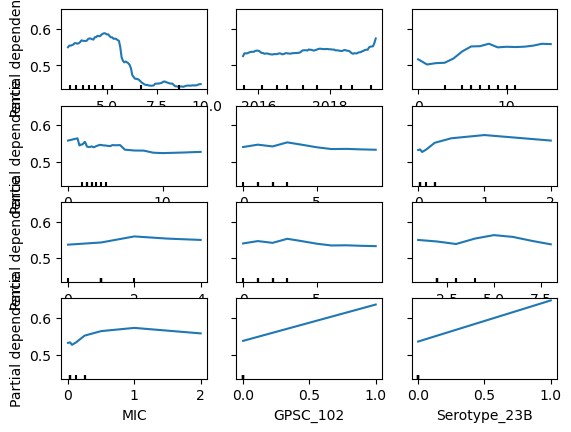

In [24]:
from sklearn.inspection import PartialDependenceDisplay

                             
# Create PartialDependenceDisplay for selected features
partial_dep_display = PartialDependenceDisplay.from_estimator(
    best_model, X, features=['Age','Year', 'ses_score', 'Crowd_index', 'Children 5 to 15', 'MIC', 'Children_under_5', 'Children 5 to 15', 'Adults', 'MIC','GPSC_102', 'Serotype_23B'],
    response_method='predict_proba'
)

In [77]:
from sklearn.linear_model import LassoCV
from sklearn.preprocessing import StandardScaler

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['ST','vaccinetype', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Use OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder()

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# For example, if 'sampleid' is not needed for analysis
df_encoded = df_encoded.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms','hh_pop','hh_pop', 'recent_div', 'Less_than_3'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Less_than_4y_3km'], axis=1)  # Assuming 'T1' is the target variable
y = df_encoded['Less_than_4y_3km']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Assuming X_train is your training feature matrix
# Standardize the features (recommended for regularization)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)

# Initialise LassoCV
lasso_cv = LassoCV(cv=5, max_iter=10000, tol=1e-4, random_state=RANDOM_SEED)

# Fit LassoCV
lasso_cv.fit(X_train_scaled, y_train)


# Print selected features
selected_feature_names = X_train.columns[selected_features]
print("Selected Features:", selected_feature_names)

# Filter X_train to keep only selected features
X_train_selected = X_train.loc[:, selected_feature_names]

# Optionally, transform X_test using the same scaler and select the same features
X_test_scaled = scaler.transform(X_test)
X_test_selected = X_test.loc[:, selected_feature_names]

# Now use X_train_selected and X_test_selected for model training and testing

print(selected_feature_names) 

# Assuming selected_feature_names is already defined and contains selected feature names
if 'MIC' in selected_feature_names:
    print("MIC is included in selected features.")
else:
    print("MIC is not included in selected features.")

Selected Features: Index(['Age', 'ses score', 'Children_under_5', 'Adults',
       'ST_038b64759c9b5970fac5f60a49cb55730ca6f9fc',
       'ST_049531b620506de38cbd405c02a3f81a20fdf536',
       'ST_0589d7119dff17d9fe82d3c79c6a2b490f809c0f',
       'ST_0815d6c6d3e1c35758cb3f0a1a063bf0c7439a0b',
       'ST_0a93a34096a2754ac11f9551c4e29534eab25f77',
       'ST_0b72c89c52ad2ec49163dddb8f3c4d9fd4b96b7d',
       ...
       'Serotype_3', 'Serotype_35A', 'Serotype_35D', 'Serotype_4',
       'Serotype_9V', 'Serotype_serogroup 24', 'Chloramphenicol_RESISTANT',
       'Clindamycin_RESISTANT', 'Trimethoprim_RESISTANT',
       'Co-Trimoxazole_RESISTANT'],
      dtype='object', length=233)
Index(['Age', 'ses score', 'Children_under_5', 'Adults',
       'ST_038b64759c9b5970fac5f60a49cb55730ca6f9fc',
       'ST_049531b620506de38cbd405c02a3f81a20fdf536',
       'ST_0589d7119dff17d9fe82d3c79c6a2b490f809c0f',
       'ST_0815d6c6d3e1c35758cb3f0a1a063bf0c7439a0b',
       'ST_0a93a34096a2754ac11f9551c4e29534ea

ValueError: Feature 'age_y' not in feature_names

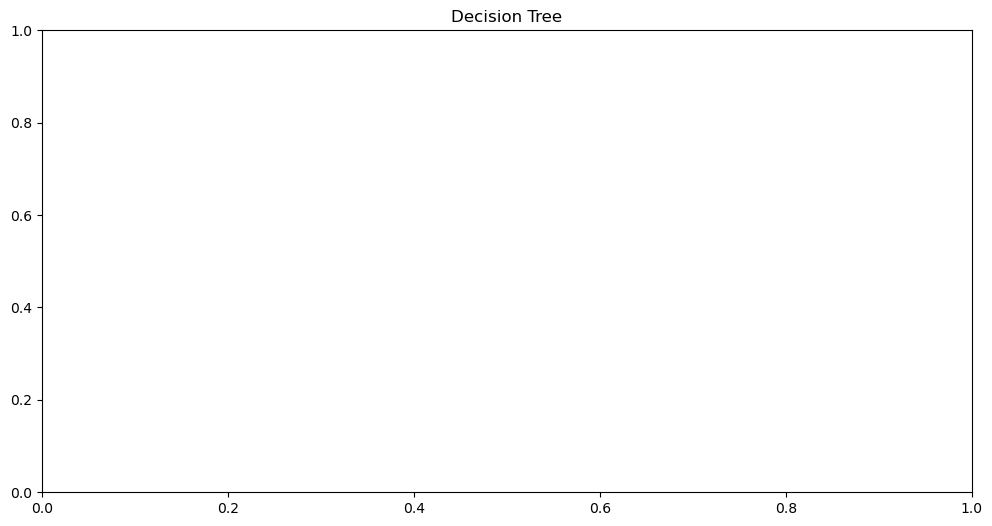

In [18]:
fig, ax = plt.subplots(figsize=(12, 6))
ax.set_title("Decision Tree")
tree_disp = PartialDependenceDisplay.from_estimator(best_model, X, ['age_y', 'Year', 'ses_score', 'crowd_index', 'Children_5_to_15', 'MIC', 'Children_under_5', 'Children_5_to_15', 'adults'], ax=ax)

In [144]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['ST','vaccinetype', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Use OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder()

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# For example, if 'sampleid' is not needed for analysis
df_encoded = df_encoded.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms','hh_pop','hh_pop', 'recent_div', 'Less_than_3'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Less_than_4y_3km'], axis=1)  # Assuming 'T1' is the target variable
y = df_encoded['Less_than_4y_3km']


RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [1000, 2000, 3000, 4000],  # Adjust as needed
    'max_depth': [10, 15, 20, 30, 40, None]  # Adjust as needed
}

# Create a Balanced Random Forest Classifier
clf = BalancedRandomForestClassifier(
    sampling_strategy="auto", replacement=True, random_state=RANDOM_SEED, bootstrap=True, oob_score=True
)

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_balanced = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_model.classes_)
disp_balanced.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Balanced Random Forest)')
plt.show()

# Print classification report for the balanced model
print("Classification Report (Balanced Random Forest):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (Balanced Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (Balanced Random Forest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm_balanced.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)


KeyboardInterrupt: 

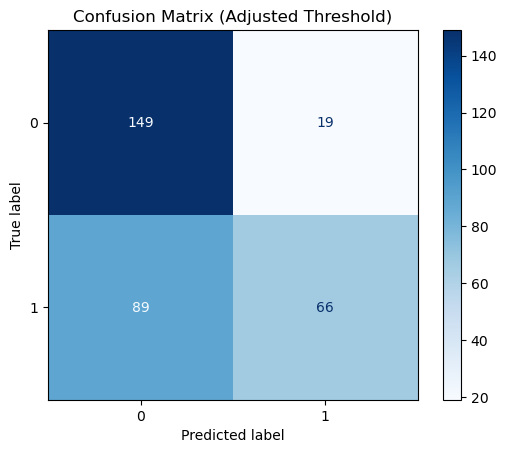

Classification Report (Adjusted Threshold):
               precision    recall  f1-score   support

           0       0.63      0.89      0.73       168
           1       0.78      0.43      0.55       155

    accuracy                           0.67       323
   macro avg       0.70      0.66      0.64       323
weighted avg       0.70      0.67      0.65       323



In [17]:
# Lowering the classification threshold
new_threshold = 0.6 # Set a new threshold, for example, 0.4

# Adjust predictions based on the new threshold
predict_test_adjusted = (probab_test >= new_threshold).astype(int)

# Plot the confusion matrix with the adjusted threshold
cm_adjusted = confusion_matrix(y_test, predict_test_adjusted, labels=best_model.classes_)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=best_model.classes_)
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Adjusted Threshold)')
plt.show()

# Print classification report for the model with adjusted threshold
print("Classification Report (Adjusted Threshold):\n", classification_report(y_test, predict_test_adjusted))



In [24]:
import shap

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm_balanced.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)

# Calculate G-mean
g_mean = (sensitivity * specificity) ** 0.5
print("G-Mean:", g_mean)


J-Statistic: 0.33114035087719307
G-Mean: 0.663398035050291


done in 91.124s


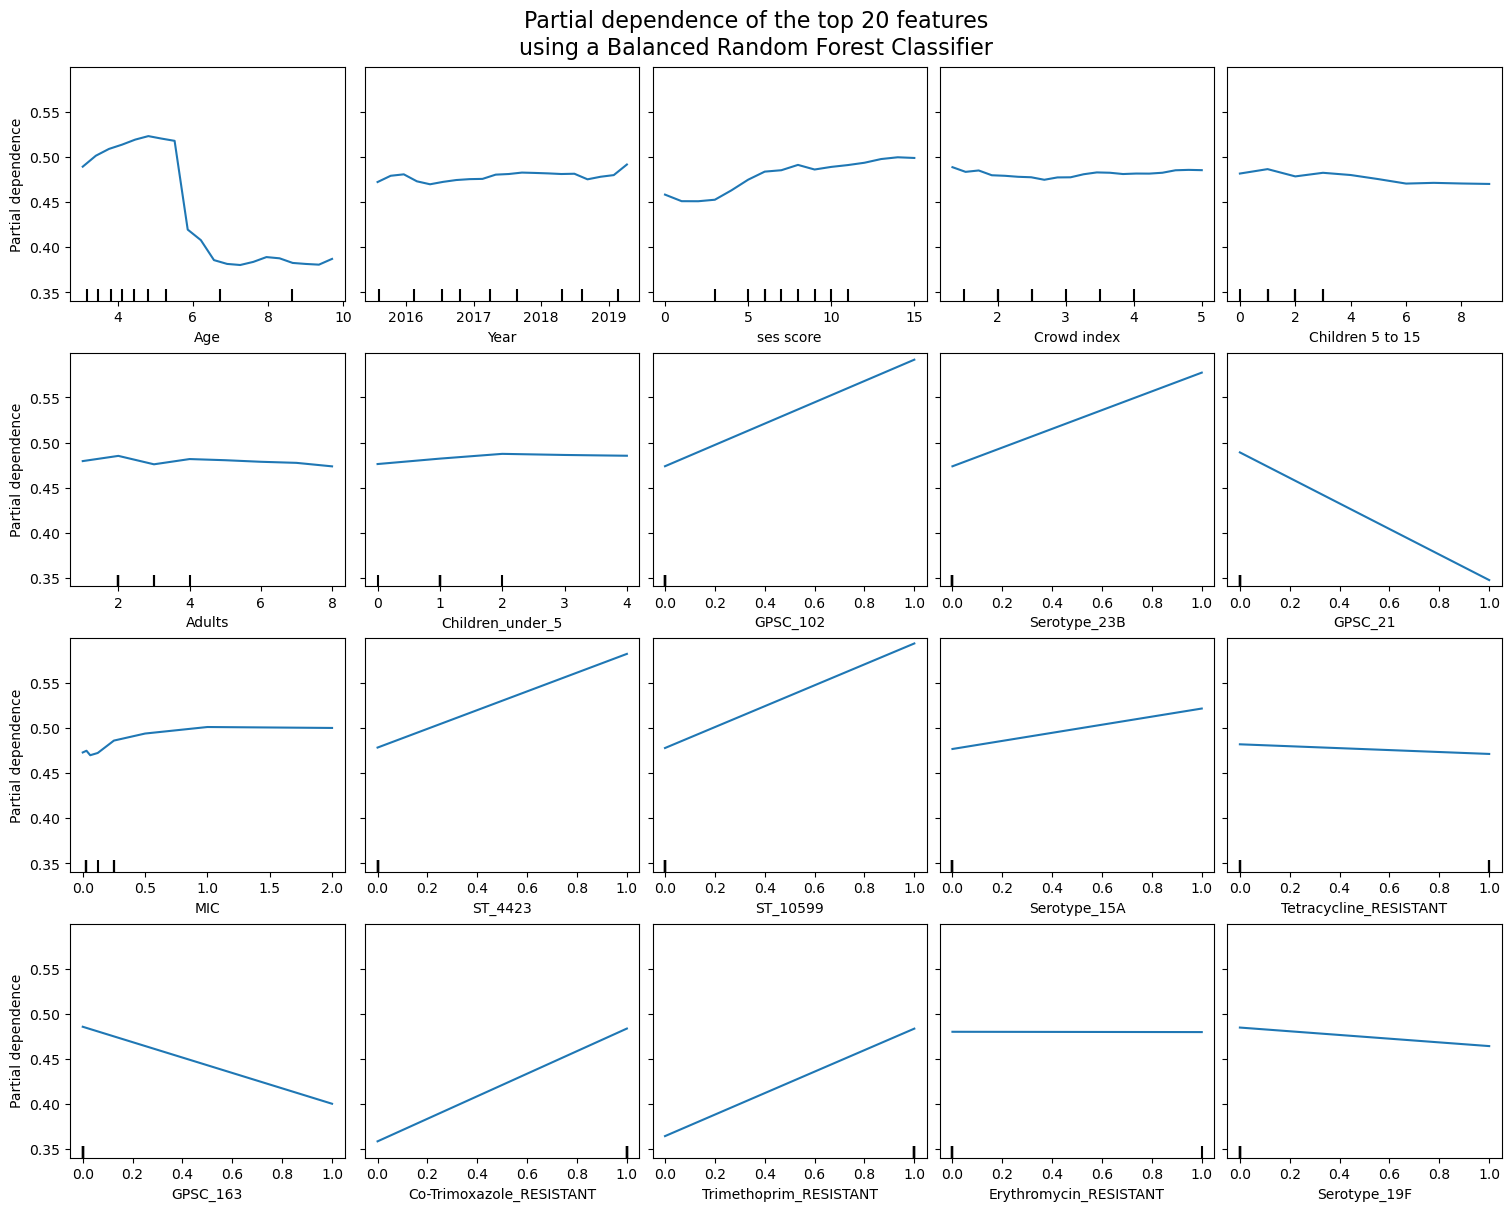

In [110]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import time

# Extract the top 20 feature names as a list
top_20_features_list = feature_importance_df['Feature'][:20].tolist()

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features_info = {
    # features of interest
    "features": top_20_features_list,
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
}

tic = time.time()
fig, ax = plt.subplots(ncols=5, nrows=4, figsize=(15, 12), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X,
    **features_info,
    ax=ax,
    response_method='predict_proba',
    **common_params,
)
print(f"done in {time.time() - tic:.3f}s")

_ = display.figure_.suptitle(
    (
        "Partial dependence of the top 20 features\n"
        "using a Balanced Random Forest Classifier"
    ),
    fontsize=16,
)

# Save the figure as an SVG file
plt.savefig('partial_dependence_plots.svg')
plt.show()


In [ ]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import time

# Extract the top 20 feature names as a list
top_20_features_list = feature_importance_df['Feature'][:25].tolist()

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features_info = {
    # features of interest
    "features": top_20_features_list,
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
}

# Start the timer
tic = time.time()

_, ax = plt.subplots(ncols=5, nrows=5, figsize=(15, 12), constrained_layout=True)
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X,
    **features_info,
    ax=ax,
    response_method='predict_proba',
    **common_params,
)
# End the timer
toc = time.time()

print(f"done in {toc - tic:.3f}s")
_ = display.figure_.suptitle(
    fontsize=16,
)


In [54]:
feature_importance_df

Feature  Importance
2                                             Age    0.074506
1                                            Year    0.073481
4                           Social economic score    0.058655
3                                     Crowd index    0.057347
6                                Children 5 to 15    0.037260
...                                           ...         ...
418   ST_d22ced28d6c62e30fc25ec179d6328f3efdfc1a2    0.000000
1143                              ANI_Cluster_859    0.000000
1378                             ANI_Cluster_1094    0.000000
258                                       ST_7068    0.000000
1235                              ANI_Cluster_951    0.000000

[1576 rows x 2 columns]

In [55]:
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.metrics import roc_curve, roc_auc_score

RANDOM_STATE = 12345

classifiers = {
    'Random Forest': RandomForestClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Random Forest)': AdaBoostClassifier(RandomForestClassifier(random_state=RANDOM_STATE)),
    'Extra Trees': ExtraTreesClassifier(random_state=RANDOM_STATE),
    'AdaBoost (Extra Tree)': AdaBoostClassifier(ExtraTreesClassifier(random_state=RANDOM_STATE)),
    'Decision Tree': DecisionTreeClassifier(random_state=RANDOM_STATE),
    'SVC (RBF)': SVC(random_state=RANDOM_STATE),
    'SVC (Linear)': LinearSVC(random_state=RANDOM_STATE),
    'Multi-layer Perceptron': MLPClassifier(max_iter=5000, random_state=RANDOM_STATE)
}

/Users/rorycave/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:886: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/rorycave/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:886: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/rorycave/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:886: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/rorycave/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:886: UserWarning: Some inputs do not have OOB scores. This probably means too few trees were used to compute any reliable OOB estimates.
  warn(
/Users/rorycave/anaconda3/lib/python3.11/site-packages/imblearn/ensemble/_forest.py:

Selected Features: Index(['MIC', 'Year', 'Age', 'Crowd_index', 'ses_score', 'Children_under_5',
       'Children 5 to 15', 'Adults',
       'ST_038b64759c9b5970fac5f60a49cb55730ca6f9fc',
       'ST_049531b620506de38cbd405c02a3f81a20fdf536',
       ...
       'Serotype_serogroup 24', 'Serotype_untypable',
       'Chloramphenicol_RESISTANT', 'Clindamycin_RESISTANT',
       'Erythromycin_RESISTANT', 'Fluoroquinolones_RESISTANT',
       'Tetracycline_RESISTANT', 'Trimethoprim_RESISTANT',
       'Sulfamethoxazole_RESISTANT', 'Co-Trimoxazole_RESISTANT'],
      dtype='object', length=345)
Best Parameters: {'max_depth': 40, 'n_estimators': 4000}
Cross-Validation Scores: [0.75755124 0.72478425 0.75714671 0.73179612 0.74993065]


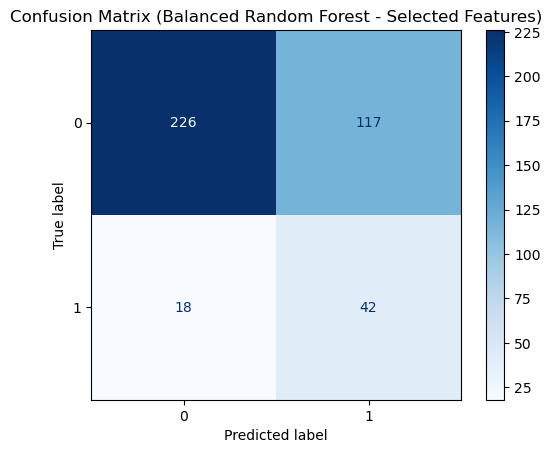

Classification Report (Balanced Random Forest - Selected Features):
               precision    recall  f1-score   support

           0       0.93      0.66      0.77       343
           1       0.26      0.70      0.38        60

    accuracy                           0.67       403
   macro avg       0.60      0.68      0.58       403
weighted avg       0.83      0.67      0.71       403



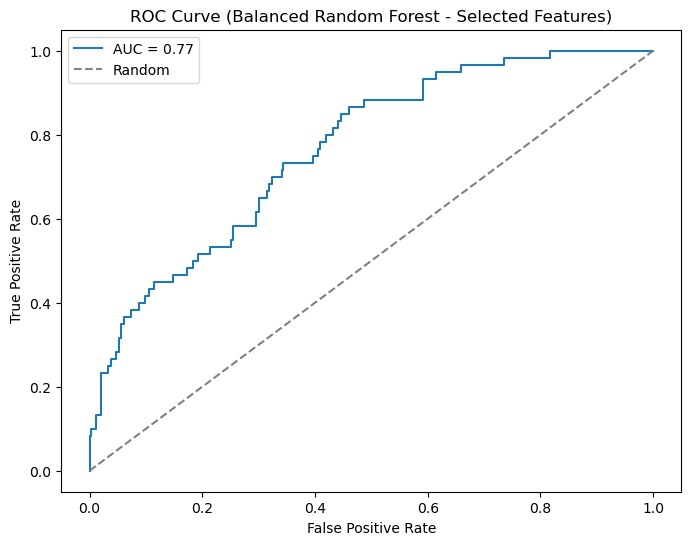

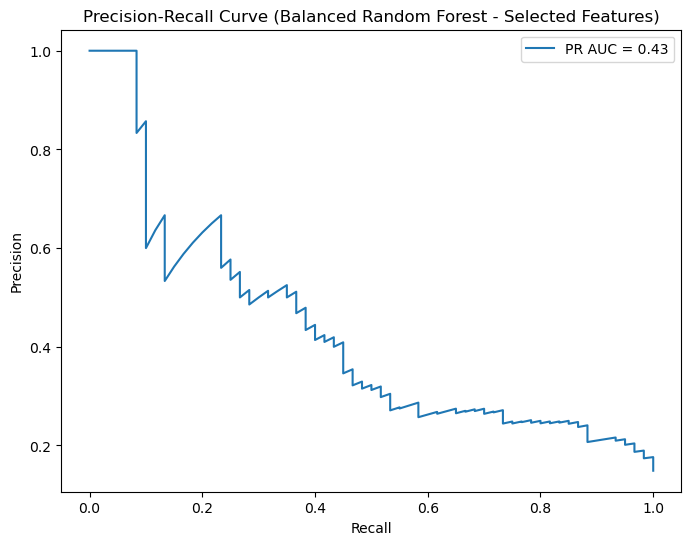

J-Statistic (Selected Features): 0.35889212827988337


In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_selection import RFECV
import pandas as pd

# Load the CSV file into a pandas DataFrame
# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['ST', 'vaccinetype', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Use OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder()

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# For example, if 'sampleid' is not needed for analysis
df_encoded = df_encoded.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms','hh_pop'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['recent_div'], axis=1)  # Assuming 'T1' is the target variable
y = df_encoded['recent_div']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [1000, 2000, 3000, 4000],  # Adjust as needed
    'max_depth': [10, 15, 20, 30, 40, None]  # Adjust as needed
}

# Create a Balanced Random Forest Classifier
clf = BalancedRandomForestClassifier(
    sampling_strategy="auto", replacement=True, random_state=RANDOM_SEED, bootstrap=True, oob_score=True
)

# Initialize RFECV with the classifier and scoring metric
rfecv = RFECV(estimator=clf, step=1, cv=5, scoring='roc_auc')

# Fit RFECV to the training data
rfecv.fit(X_train, y_train)

# Get the selected features
selected_features = X_train.columns[rfecv.support_]

# Print the selected features
print("Selected Features:", selected_features)

# Transform the training and test sets to include only the selected features
X_train_selected = rfecv.transform(X_train)
X_test_selected = rfecv.transform(X_test)

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train_selected, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train_selected, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train_selected, y_train)

# Use the best model for predictions
predict_test_selected = best_model.predict(X_test_selected)

# Extract probabilities for the positive class (assuming binary classification)
probab_test_selected = best_model.predict_proba(X_test_selected)[:, 1]

# Plot the confusion matrix
cm_balanced_selected = confusion_matrix(y_test, predict_test_selected, labels=best_model.classes_)
disp_balanced_selected = ConfusionMatrixDisplay(confusion_matrix=cm_balanced_selected, display_labels=best_model.classes_)
disp_balanced_selected.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Balanced Random Forest - Selected Features)')
plt.show()

# Print classification report for the balanced model
print("Classification Report (Balanced Random Forest - Selected Features):\n", classification_report(y_test, predict_test_selected))

# Plot ROC curve
fpr_selected, tpr_selected, thresholds_selected = roc_curve(y_test, probab_test_selected)
roc_auc_selected = auc(fpr_selected, tpr_selected)

plt.figure(figsize=(8, 6))
plt.plot(fpr_selected, tpr_selected, label=f'AUC = {roc_auc_selected:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (Balanced Random Forest - Selected Features)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision_selected, recall_selected, _ = precision_recall_curve(y_test, probab_test_selected)
pr_auc_selected = average_precision_score(y_test, probab_test_selected)

plt.figure(figsize=(8, 6))
plt.plot(recall_selected, precision_selected, label=f'PR AUC = {pr_auc_selected:.2f}')
plt.title('Precision-Recall Curve (Balanced Random Forest - Selected Features)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Calculate sensitivity and specificity
tn_selected, fp_selected, fn_selected, tp_selected = cm_balanced_selected.ravel()
sensitivity_selected = tp_selected / (tp_selected + fn_selected)
specificity_selected = tn_selected / (tn_selected + fp_selected)

# Calculate J-statistic
j_statistic_selected = sensitivity_selected + specificity_selected - 1
print("J-Statistic (Selected Features):", j_statistic_selected)


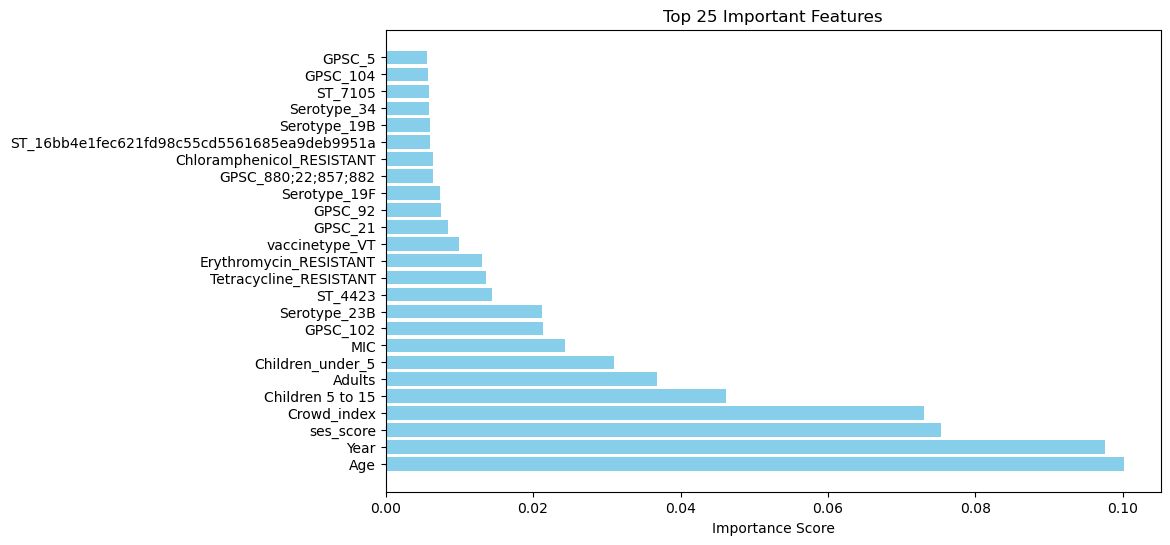

In [28]:
# Plot Important Features
feature_importance = best_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 25  # You can adjust the number of features to display
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n], color='skyblue')
plt.xlabel('Importance Score')
plt.title(f'Top {top_n} Important Features')
plt.show()

In [24]:
# Check the lengths
feature_names_length = len(selected_features)
feature_importances_length = len(feature_importances)

print(f"Length of selected_features: {feature_names_length}")
print(f"Length of feature_importances: {feature_importances_length}")

# If the lengths do not match, debug why they are different
if feature_names_length != feature_importances_length:
    # Print the features and their importances for manual inspection
    print("Selected features:", selected_features)
    print("Feature importances:", feature_importances)

    # Optionally: align them correctly (example logic, depending on your specific case)
    # selected_features = selected_features[:feature_importances_length]
    # or you need to debug why there's a discrepancy in feature selection and model training

# Create the DataFrame if the lengths match
if feature_names_length == feature_importances_length:
    importance_df = pd.DataFrame({'Feature': selected_features, 'Importance': feature_importances})
    importance_df = importance_df.sort_values(by='Importance', ascending=False)
else:
    print("Error: The lengths of selected features and feature importances do not match.")


Length of selected_features: 345
Length of feature_importances: 359
Selected features: Index(['MIC', 'Year', 'Age', 'Crowd_index', 'ses_score', 'Children_under_5',
       'Children 5 to 15', 'Adults',
       'ST_038b64759c9b5970fac5f60a49cb55730ca6f9fc',
       'ST_049531b620506de38cbd405c02a3f81a20fdf536',
       ...
       'Serotype_serogroup 24', 'Serotype_untypable',
       'Chloramphenicol_RESISTANT', 'Clindamycin_RESISTANT',
       'Erythromycin_RESISTANT', 'Fluoroquinolones_RESISTANT',
       'Tetracycline_RESISTANT', 'Trimethoprim_RESISTANT',
       'Sulfamethoxazole_RESISTANT', 'Co-Trimoxazole_RESISTANT'],
      dtype='object', length=345)
Feature importances: [2.42688915e-02 9.75944708e-02 1.00108809e-01 7.29751888e-02
 7.53492680e-02 3.09272968e-02 4.62018973e-02 3.68551438e-02
 0.00000000e+00 1.21595906e-04 0.00000000e+00 7.96576238e-05
 2.06187888e-03 1.88598595e-04 7.30859609e-05 4.97628911e-03
 2.85565820e-03 1.18275321e-03 4.24071580e-03 5.37747204e-03
 3.15963025e-03 1

In [38]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import time

# Get the selected feature indices
selected_feature_indices = rfecv.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Modify X to include only the selected features
X_selected = X[selected_features]


# Extract the top 25 feature names as a list
top_25_features_list = importance_df['Feature'].head(25).tolist()

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features_info = {
    # features of interest
    "features": top_25_features_list,
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
}

# Start the timer
tic = time.time()

# Create subplots for the partial dependence plots
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(15, 12), constrained_layout=True)

# Generate Partial Dependence Display from the estimator
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X_selected,
    **features_info,
    ax=ax,
    response_method='predict_proba',
    **common_params,
)

# End the timer
toc = time.time()

# Print the time taken to generate the plots
print(f"Plots generated in {toc - tic:.3f}s")

# Set a title for the figure
_ = display.figure_.suptitle('Partial Dependence Plots for Top 25 Features', fontsize=16)


NameError: name 'importance_df' is not defined

In [37]:
import matplotlib.pyplot as plt
from sklearn.inspection import PartialDependenceDisplay
import time

# Get the selected feature indices
selected_feature_indices = rfecv.get_support(indices=True)

# Get the names of the selected features
selected_features = X.columns[selected_feature_indices]

# Modify X to include only the selected features
X_selected = X[selected_features]


# Extract the top 25 feature names as a list
top_25_features_list = importance_df['Feature'].head(25).tolist()

common_params = {
    "subsample": 50,
    "n_jobs": 2,
    "grid_resolution": 20,
    "random_state": 0,
}

features_info = {
    # features of interest
    "features": top_25_features_list,
    # type of partial dependence plot
    "kind": "average",
    # information regarding categorical features
}

# Start the timer
tic = time.time()

# Create subplots for the partial dependence plots
fig, ax = plt.subplots(ncols=5, nrows=5, figsize=(15, 12), constrained_layout=True)

# Generate Partial Dependence Display from the estimator
display = PartialDependenceDisplay.from_estimator(
    best_model,
    X_selected,
    **features_info,
    ax=ax,
    response_method='predict_proba',
    **common_params,
)

# End the timer
toc = time.time()

# Print the time taken to generate the plots
print(f"Plots generated in {toc - tic:.3f}s")

# Set a title for the figure
_ = display.figure_.suptitle('Partial Dependence Plots for Top 25 Features', fontsize=16)


NameError: name 'importance_df' is not defined

Computing partial dependence plots and individual conditional expectation...


ValueError: Unable to coerce to Series, length must be 543: given 3

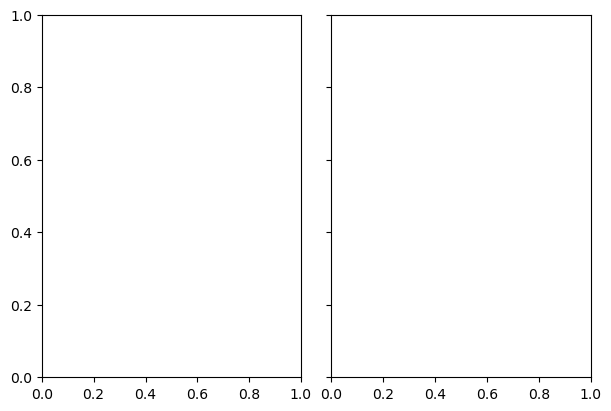

In [49]:
print("Computing partial dependence plots and individual conditional expectation...")
_, ax = plt.subplots(ncols=2, figsize=(6, 4), sharey=True, constrained_layout=True)

features_info = {
    "features": ["Year", "Age"],
    "kind": "both",
    "centered": True,
}

display = PartialDependenceDisplay.from_estimator(
    best_model,
    X_selected
    **features_info,
    ax=ax,
    **common_params,
)
print(f"done in {time() - tic:.3f}s")
_ = display.figure_.suptitle("ICE and PDP representations", fontsize=16)


In [3]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from catboost import CatBoostClassifier, Pool
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for CatBoost
columns_to_encode = ['ST', 'vaccinetype', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Convert categorical columns to category dtype
for col in columns_to_encode:
    df[col] = df[col].astype('category')

# Drop unnecessary columns
df = df.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms', 'hh_pop'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop(['recent_div'], axis=1)
y = df['recent_div']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'iterations': [1000, 2000, 3000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Create a CatBoost Classifier
cat_features = [X.columns.get_loc(col) for col in columns_to_encode]

from sklearn.utils.class_weight import compute_class_weight

classes = np.unique(y_train)
weights = compute_class_weight(class_weight='balanced', classes=classes, y=y_train)
class_weights = dict(zip(classes, weights))

# Use GridSearchCV for hyperparameter tuning with cross-validation
catboost_model = CatBoostClassifier(random_seed=RANDOM_SEED, silent=True, cat_features=cat_features, class_weights='class_weights')

grid_search = GridSearchCV(catboost_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_catboost = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_catboost = ConfusionMatrixDisplay(confusion_matrix=cm_catboost, display_labels=best_model.classes_)
disp_catboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CatBoost)')
plt.show()

# Print classification report for the CatBoost model
print("Classification Report (CatBoost):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (CatBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (CatBoost)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Find the optimal threshold for maximum precision-recall trade-off
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]
print("Optimal Threshold:", optimal_threshold)

# Adjust the decision threshold
adjusted_predict_test = (probab_test >= optimal_threshold).astype(int)

# Print adjusted classification report
print("Adjusted Classification Report (CatBoost):\n", classification_report(y_test, adjusted_predict_test))

# Plot the adjusted confusion matrix
cm_adjusted = confusion_matrix(y_test, adjusted_predict_test, labels=best_model.classes_)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=best_model.classes_)
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Adjusted Confusion Matrix (CatBoost)')
plt.show()


ValueError: 
All the 540 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
540 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/catboost/core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/catboost/core.py", line 2385, in _fit
    train_params = self._prepare_train_params(
                   ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/catboost/core.py", line 2311, in _prepare_train_params
    _check_train_params(params)
  File "_catboost.pyx", line 6393, in _catboost._check_train_params
  File "_catboost.pyx", line 6415, in _catboost._check_train_params
_catboost.CatBoostError: /Users/zomb-ml-platform-msk/go-agent-21.2.0/pipelines/BuildMaster/catboost.git/catboost/private/libs/options/json_helper.h:41: Can't parse parameter "class_weights" with value: "class_weights"


/Users/rorycave/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


Best Parameters: {'depth': 6, 'iterations': 1000, 'l2_leaf_reg': 1, 'learning_rate': 0.01}
Cross-Validation Scores: [0.73705502 0.7026699  0.78708198 0.80277393 0.72317073]


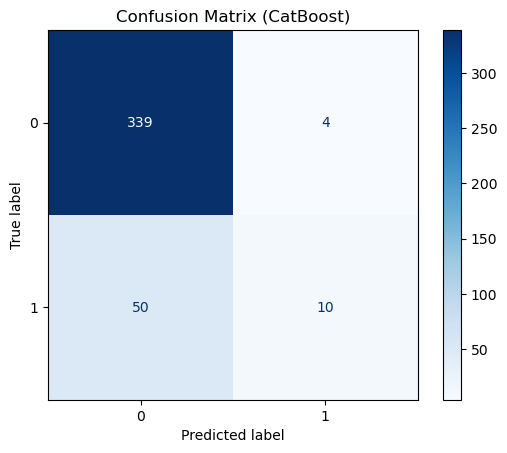

Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.87      0.99      0.93       343
           1       0.71      0.17      0.27        60

    accuracy                           0.87       403
   macro avg       0.79      0.58      0.60       403
weighted avg       0.85      0.87      0.83       403



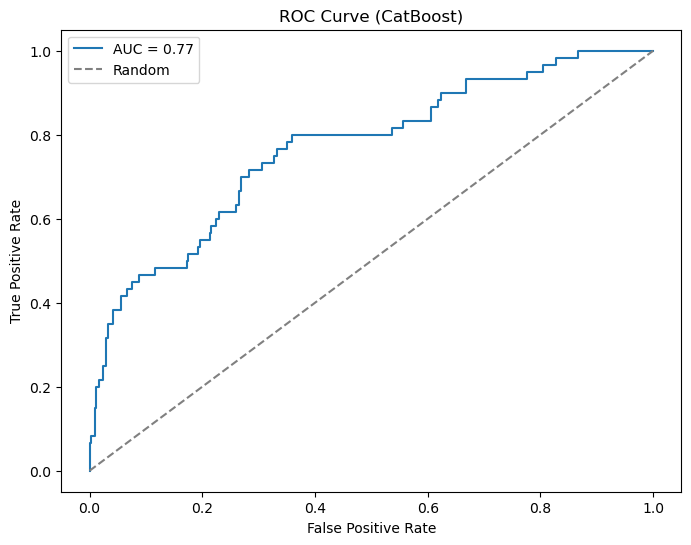

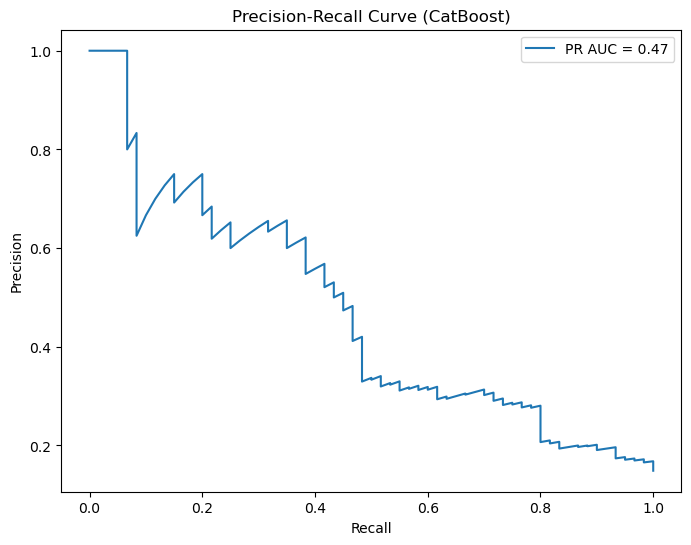

Optimal Threshold: 0.2699861956980251
Adjusted Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.90      0.94      0.92       343
           1       0.57      0.42      0.48        60

    accuracy                           0.87       403
   macro avg       0.74      0.68      0.70       403
weighted avg       0.85      0.87      0.86       403



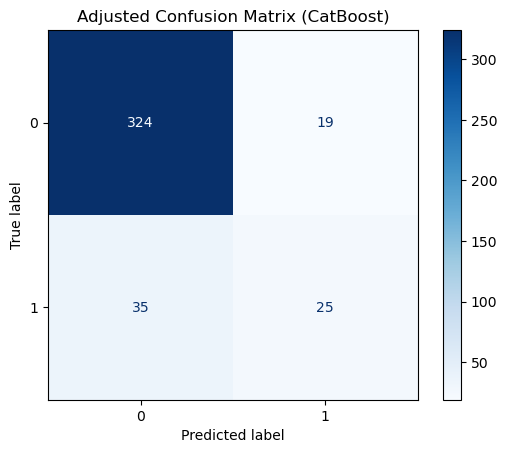

ValueError: could not convert string to float: '880;22;857;882'

In [6]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier, Pool

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for CatBoost
columns_to_encode = ['ST', 'vaccinetype', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Convert categorical columns to category dtype
for col in columns_to_encode:
    df[col] = df[col].astype('category')

# Drop unnecessary columns
df = df.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms', 'hh_pop'], axis=1)

# Drop rows with missing values
df = df.dropna()

# Separate features (X) and target variable (y)
X = df.drop(['recent_div'], axis=1)
y = df['recent_div']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'iterations': [1000, 2000, 3000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Create a CatBoost Classifier
cat_features = [X.columns.get_loc(col) for col in columns_to_encode]

# Use GridSearchCV for hyperparameter tuning with cross-validation
catboost_model = CatBoostClassifier(random_seed=RANDOM_SEED, silent=True, cat_features=cat_features)

grid_search = GridSearchCV(catboost_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_catboost = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_catboost = ConfusionMatrixDisplay(confusion_matrix=cm_catboost, display_labels=best_model.classes_)
disp_catboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CatBoost)')
plt.show()

# Print classification report for the CatBoost model
print("Classification Report (CatBoost):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (CatBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (CatBoost)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Find the optimal threshold for maximum precision-recall trade-off
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]
print("Optimal Threshold:", optimal_threshold)

# Adjust the decision threshold
adjusted_predict_test = (probab_test >= optimal_threshold).astype(int)

# Print adjusted classification report
print("Adjusted Classification Report (CatBoost):\n", classification_report(y_test, adjusted_predict_test))

# Plot the adjusted confusion matrix
cm_adjusted = confusion_matrix(y_test, adjusted_predict_test, labels=best_model.classes_)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=best_model.classes_)
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Adjusted Confusion Matrix (CatBoost)')
plt.show()

# Ensemble Methods
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
bagging = BaggingClassifier()

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[('rf', random_forest), ('adb', ada_boost), ('bg', bagging)])

# Fit the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predictions
ensemble_predictions = ensemble_classifier.predict(X_test)

# Evaluation
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


In [30]:
pip install lightgbm

DEPRECATION: Loading egg at /Users/rorycave/anaconda3/lib/python3.11/site-packages/intbitset-3.0.2-py3.11-macosx-10.9-x86_64.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/rorycave/anaconda3/lib/python3.11/site-packages/panaroo-1.3.4-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/rorycave/anaconda3/lib/python3.11/site-packages/fasttranscluster-0.0.1-py3.11.egg is deprecated. pip 24.3 will enforce this behaviour change. A possible replacement is to use pip for package installation.. Discussion can be found at https://github.com/pypa/pip/issues/12330
DEPRECATION: Loading egg at /Users/rorycave/anaconda3/lib/python3.11/s

Feature Importances:
Age: 16.440609623396377
Year: 14.199633403601355
ses_score: 8.275849325047002
Crowd_index: 8.101704877864114
GPSC_102: 4.215460191935136
Children 5 to 15: 3.5564254329963707
Children_under_5: 3.24025714844079
Adults: 2.992559244781087
Tetracycline_RESISTANT: 2.11752006369283
MIC: 2.057520507190454
Erythromycin_RESISTANT: 1.832638707771443
GPSC_21: 1.6483937237186734
ST_4423: 1.631818240681715
ST_2053: 1.4267239855532945
ST_11774: 1.4066528758904513
vaccinetype_VT: 1.1650183338121367
ST_16bb4e1fec621fd98c55cd5561685ea9deb9951a: 1.0929629521159292
GPSC_104: 1.0337061224115658
GPSC_92: 1.0171719568535733
ST_10554: 0.991921587633574
ST_10599: 0.9906635486325264
Serotype_19B: 0.9712331184271669
Serotype_23B: 0.7819690007696045
ST_7105: 0.7657895382406161
GPSC_880;22;857;882: 0.7299890636209017
Serotype_untypable: 0.6281526501260287
ST_782: 0.6160163976014736
ST_9473: 0.5693866912688463
Serotype_09L: 0.560391990134043
GPSC_65: 0.5556700797971068
Serotype_15A: 0.524140441

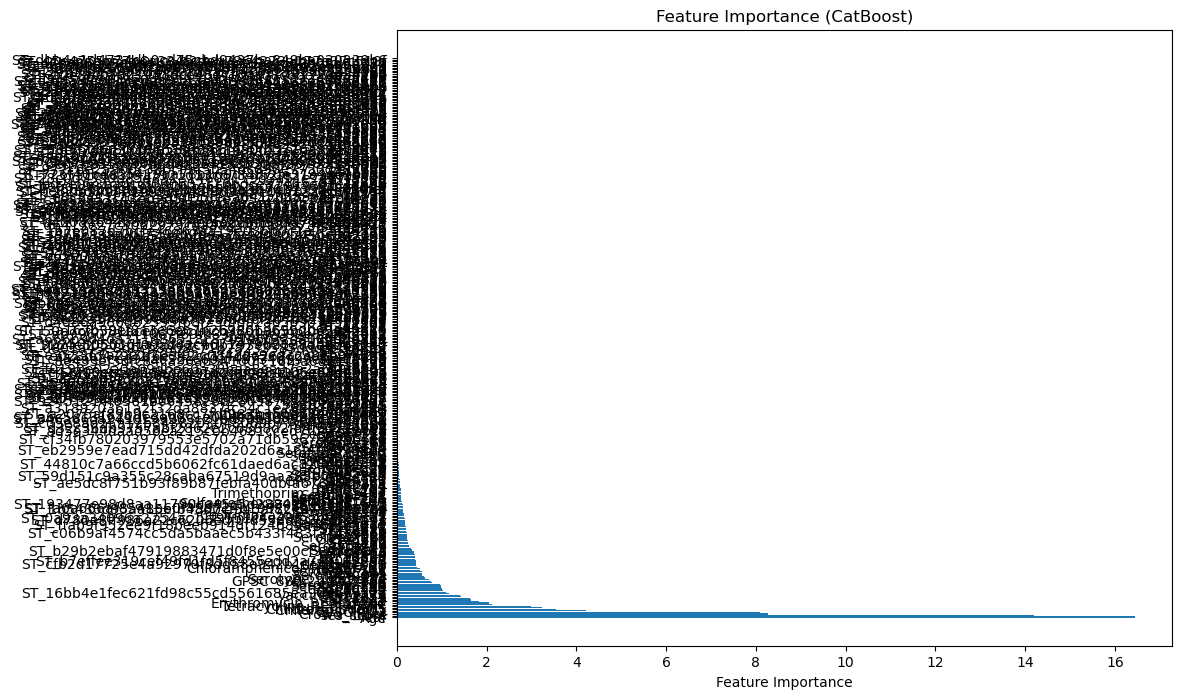

In [12]:
# Fit the best model
best_model.fit(X_train, y_train)

# Get feature importances
feature_importance = best_model.feature_importances_

# Sort feature importances in descending order
sorted_idx = np.argsort(feature_importance)[::-1]

# Print feature importance scores
print("Feature Importances:")
for idx in sorted_idx:
    print(f"{X.columns[idx]}: {feature_importance[idx]}")

# Plot feature importances
plt.figure(figsize=(10, 8))
plt.barh(range(len(sorted_idx)), feature_importance[sorted_idx], align='center')
plt.yticks(range(len(sorted_idx)), [X.columns[idx] for idx in sorted_idx])
plt.xlabel('Feature Importance')
plt.title('Feature Importance (CatBoost)')
plt.show()



In [20]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from catboost import CatBoostClassifier, Pool

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['ST', 'vaccinetype', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Use OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder()

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# For example, if 'sampleid' is not needed for analysis
df_encoded = df_encoded.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms','hh_pop'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['recent_div'], axis=1)  # Assuming 'T1' is the target variable
y = df_encoded['recent_div']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'iterations': [1000, 2000, 3000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Create a CatBoost Classifier
cat_features = [X.columns.get_loc(col) for col in columns_to_encode]

# Use GridSearchCV for hyperparameter tuning with cross-validation
catboost_model = CatBoostClassifier(random_seed=RANDOM_SEED, silent=True)

grid_search = GridSearchCV(catboost_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_catboost = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_catboost = ConfusionMatrixDisplay(confusion_matrix=cm_catboost, display_labels=best_model.classes_)
disp_catboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CatBoost)')
plt.show()

# Print classification report for the CatBoost model
print("Classification Report (CatBoost):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (CatBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (CatBoost)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Find the optimal threshold for maximum precision-recall trade-off
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]
print("Optimal Threshold:", optimal_threshold)

# Adjust the decision threshold
adjusted_predict_test = (probab_test >= optimal_threshold).astype(int)

# Print adjusted classification report
print("Adjusted Classification Report (CatBoost):\n", classification_report(y_test, adjusted_predict_test))

# Plot the adjusted confusion matrix
cm_adjusted = confusion_matrix(y_test, adjusted_predict_test, labels=best_model.classes_)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=best_model.classes_)
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Adjusted Confusion Matrix (CatBoost)')
plt.show()

# Ensemble Methods
random_forest = RandomForestClassifier()
ada_boost = AdaBoostClassifier()
bagging = BaggingClassifier()

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[('rf', random_forest), ('adb', ada_boost), ('bg', bagging)])

# Fit the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predictions
ensemble_predictions = ensemble_classifier.predict(X_test)

# Evaluation
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)

KeyError: "['vaccinetype'] not in index"

In [21]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, accuracy_score
from sklearn.ensemble import VotingClassifier, BaggingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import OneHotEncoder
from catboost import CatBoostClassifier

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['ST', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Use get_dummies for one-hot encoding
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# Drop unnecessary columns
columns_to_drop = ['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms', 'hh_pop']
df_encoded = df_encoded.drop(columns=columns_to_drop, errors='ignore')

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Less_than_3'], axis=1)  # Assuming 'recent_div' is the target variable
y = df_encoded['Less_than_3']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'iterations': [1000, 2000, 3000],
    'depth': [6, 8, 10],
    'learning_rate': [0.01, 0.05, 0.1],
    'l2_leaf_reg': [1, 3, 5, 7]
}

# Identify categorical feature indices
cat_features = [X.columns.get_loc(col) for col in X.columns if col in columns_to_encode]

# Use GridSearchCV for hyperparameter tuning with cross-validation
catboost_model = CatBoostClassifier(random_seed=RANDOM_SEED, silent=True)
grid_search = GridSearchCV(catboost_model, param_grid, scoring='roc_auc', cv=5, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Get the best parameters and model
best_params = grid_search.best_params_
print("Best Parameters:", best_params)
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_catboost = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_catboost = ConfusionMatrixDisplay(confusion_matrix=cm_catboost, display_labels=best_model.classes_)
disp_catboost.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (CatBoost)')
plt.show()

# Print classification report for the CatBoost model
print("Classification Report (CatBoost):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (CatBoost)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, thresholds_pr = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (CatBoost)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Find the optimal threshold for maximum precision-recall trade-off
f1_scores = 2 * (precision * recall) / (precision + recall)
optimal_threshold = thresholds_pr[np.argmax(f1_scores)]
print("Optimal Threshold:", optimal_threshold)

# Adjust the decision threshold
adjusted_predict_test = (probab_test >= optimal_threshold).astype(int)

# Print adjusted classification report
print("Adjusted Classification Report (CatBoost):\n", classification_report(y_test, adjusted_predict_test))

# Plot the adjusted confusion matrix
cm_adjusted = confusion_matrix(y_test, adjusted_predict_test, labels=best_model.classes_)
disp_adjusted = ConfusionMatrixDisplay(confusion_matrix=cm_adjusted, display_labels=best_model.classes_)
disp_adjusted.plot(cmap=plt.cm.Blues)
plt.title('Adjusted Confusion Matrix (CatBoost)')
plt.show()

# Ensemble Methods
random_forest = RandomForestClassifier(random_state=RANDOM_SEED)
ada_boost = AdaBoostClassifier(random_state=RANDOM_SEED)
bagging = BaggingClassifier(random_state=RANDOM_SEED)

# Create a Voting Classifier
ensemble_classifier = VotingClassifier(estimators=[('rf', random_forest), ('adb', ada_boost), ('bg', bagging)], voting='soft')

# Fit the ensemble classifier
ensemble_classifier.fit(X_train, y_train)

# Predictions
ensemble_predictions = ensemble_classifier.predict(X_test)

# Evaluation
ensemble_accuracy = accuracy_score(y_test, ensemble_predictions)
print("Ensemble Accuracy:", ensemble_accuracy)


/Users/rorycave/anaconda3/lib/python3.11/site-packages/joblib/externals/loky/process_executor.py:752: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(
Exception ignored in: <bound method IPythonKernel._clean_thread_parent_frames of <ipykernel.ipkernel.IPythonKernel object at 0x10486ff10>>
Traceback (most recent call last):
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/ipykernel/ipkernel.py", line 770, in _clean_thread_parent_frames
    def _clean_thread_parent_frames(

KeyboardInterrupt: 

KeyboardInterrupt



Best Parameters: {'max_depth': 20, 'n_estimators': 1000}
Cross-Validation Scores: [0.99330398 0.98956385 0.99517404 0.99758702 0.99969616]


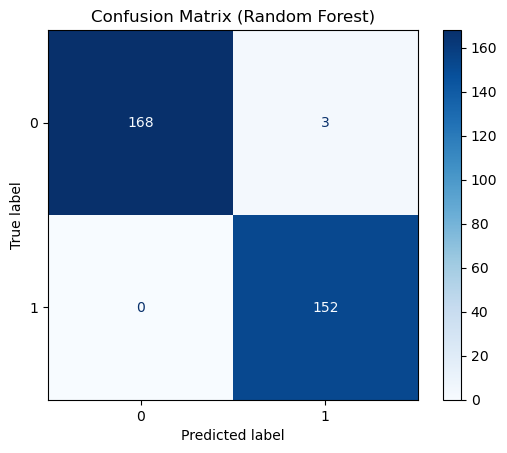

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       1.00      0.98      0.99       171
           1       0.98      1.00      0.99       152

    accuracy                           0.99       323
   macro avg       0.99      0.99      0.99       323
weighted avg       0.99      0.99      0.99       323



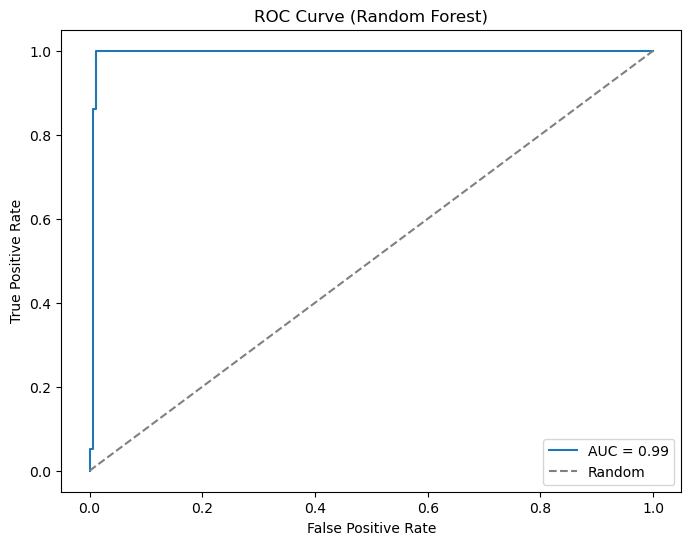

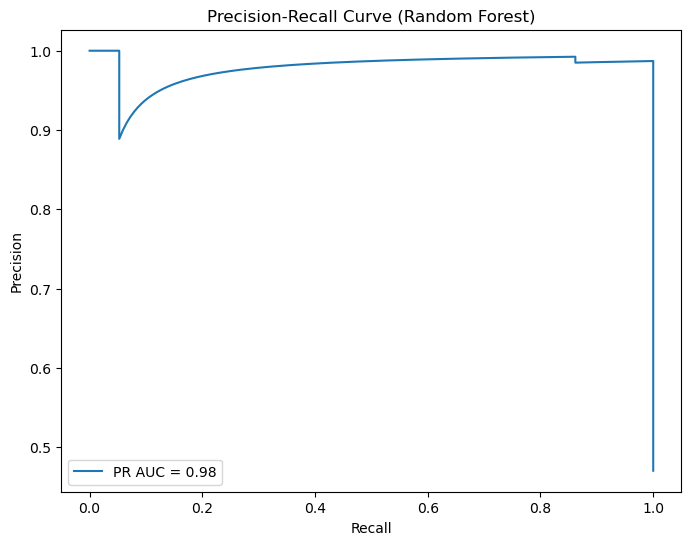

J-Statistic: 0.9824561403508771


In [14]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier  # Changed import
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['cohort','ST','sex', 'Risk','Vaccinetype', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Use OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder()

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# For example, if 'sampleid' is not needed for analysis
df_encoded = df_encoded.drop(['id', 'MIC_cat', 'AMR', 'No_rooms','hh_pop', 'recent_div', 'Less_than_4y_3km'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Less_than_3'], axis=1)  # Assuming 'T1' is the target variable
y = df_encoded['Less_than_3']


RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [1000, 2000, 3000, 4000],  # Adjust as needed
    'max_depth': [10, 15, 20, 30, 40, None]  # Adjust as needed
}

# Create a Random Forest Classifier (not balanced)
clf = RandomForestClassifier(
    random_state=RANDOM_SEED, bootstrap=True, oob_score=True
)

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm = confusion_matrix(y_test, predict_test)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=best_model.classes_)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Random Forest)')
plt.show()

# Print classification report for the model
print("Classification Report (Random Forest):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (Random Forest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)


In [12]:
# PCA on all components
from sklearn.decomposition import PCA
nComp = 28

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')


df_drop=df.drop(['recent_div', 'Less_than_3', 'MIC_cat', 'id'], axis=1)

df_drop=df_drop.dropna()
pca = PCA(n_components=nComp)

pca.fit(df_drop)


ValueError: could not convert string to float: '880;22;857;882'

Best Parameters: {'max_depth': 30, 'n_estimators': 1000}
Cross-Validation Scores: [0.78319358 0.73819147 0.74537009 0.74500814 0.75893291]


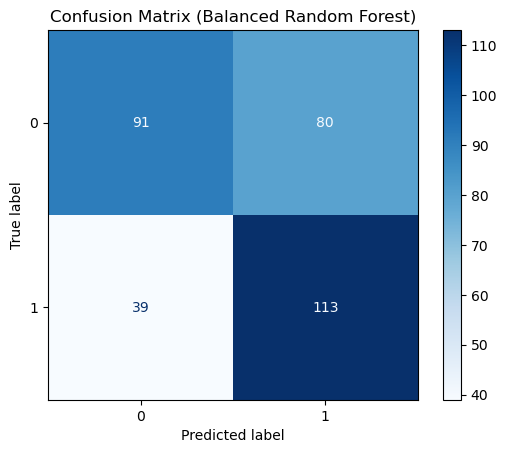

Classification Report (Balanced Random Forest):
               precision    recall  f1-score   support

           0       0.70      0.53      0.60       171
           1       0.59      0.74      0.66       152

    accuracy                           0.63       323
   macro avg       0.64      0.64      0.63       323
weighted avg       0.65      0.63      0.63       323



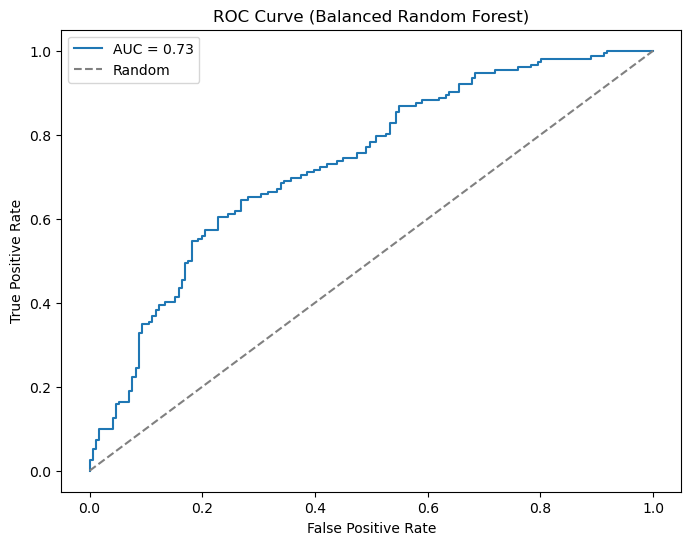

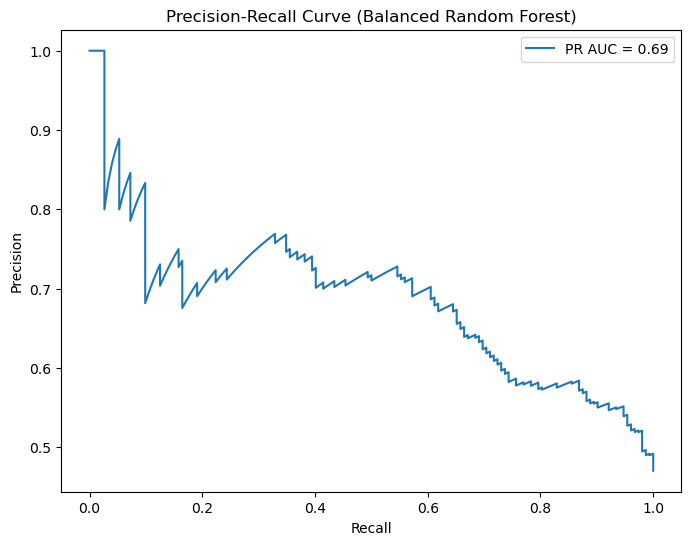

J-Statistic: 0.2755847953216375


In [15]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, roc_auc_score
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
import pandas as pd
import numpy as np

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['ST', 'GPSC', 'Serotype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']

# Use OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder()

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# For example, if 'sampleid' is not needed for analysis
df_encoded = df_encoded.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms','hh_pop','hh_pop', 'recent_div', 'Less_than_4y_3km'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Less_than_3'], axis=1)  # Assuming 'Less_than_4y_3km' is the target variable
y = df_encoded['Less_than_3']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [1000, 2000, 3000, 4000],  # Adjust as needed
    'max_depth': [10, 15, 20, 30, 40, None]  # Adjust as needed
}

# Create a Balanced Random Forest Classifier
clf = BalancedRandomForestClassifier(
    sampling_strategy="auto", replacement=True, random_state=RANDOM_SEED, bootstrap=True, oob_score=True
)

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_balanced = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_model.classes_)
disp_balanced.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Balanced Random Forest)')
plt.savefig('confusion_matrix.svg')
plt.show()

# Print classification report for the balanced model
print("Classification Report (Balanced Random Forest):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (Balanced Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_curve.svg')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (Balanced Random Forest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision_recall_curve.svg')
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm_balanced.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)


Best Parameters: {'max_depth': 30, 'n_estimators': 1000}
Cross-Validation Scores: [0.79043253 0.74591301 0.75206612 0.74313808 0.7599052 ]


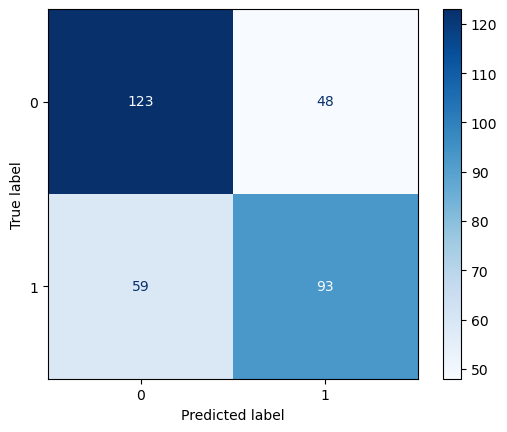

Classification Report (Random Forest):
               precision    recall  f1-score   support

           0       0.68      0.72      0.70       171
           1       0.66      0.61      0.63       152

    accuracy                           0.67       323
   macro avg       0.67      0.67      0.67       323
weighted avg       0.67      0.67      0.67       323



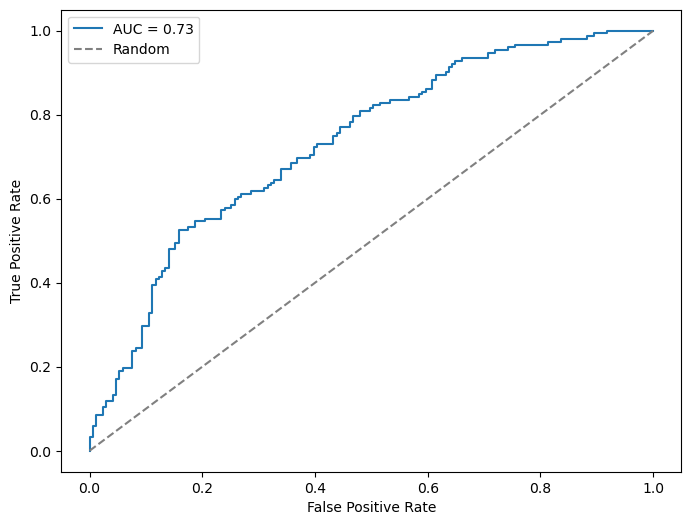

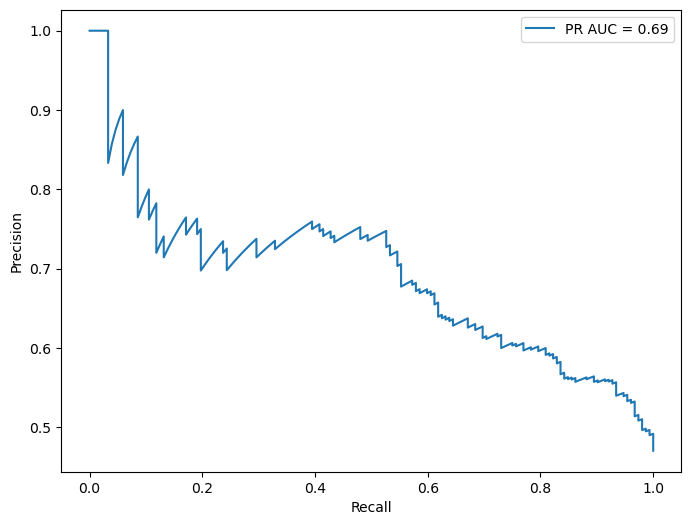

J-Statistic: 0.9824561403508771
G-Mean: 0.9911892555667041


In [22]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report, roc_auc_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import ConfusionMatrixDisplay
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding
columns_to_encode = ['ST', 'GPSC']

# Use OneHotEncoder for categorical columns
onehot_encoder = OneHotEncoder()

# Apply one-hot encoding to the specified columns
df_encoded = pd.get_dummies(df, columns=columns_to_encode, drop_first=True)

# For example, if 'sampleid' is not needed for analysis
df_encoded = df_encoded.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'Serotype', 'AMR' , 'No_rooms','hh_pop','hh_pop', 'recent_div', 'Less_than_4y_3km'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Less_than_3'], axis=1)  # Assuming 'Less_than_4y_3km' is the target variable
y = df_encoded['Less_than_3']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [1000, 2000, 3000, 4000],  # Adjust as needed
    'max_depth': [10, 15, 20, 30, 40, None]  # Adjust as needed
}

# Create a Random Forest Classifier
clf = RandomForestClassifier(random_state=RANDOM_SEED, bootstrap=True, oob_score=True)

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_balanced = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_model.classes_)
disp_balanced.plot(cmap=plt.cm.Blues)
plt.savefig('confusion_matrix.svg')
plt.show()

# Print classification report for the balanced model
print("Classification Report (Random Forest):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_curve.svg')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision_recall_curve.svg')
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm_balanced.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)

# Calculate G-mean
g_mean = (sensitivity * specificity) ** 0.5
print("G-Mean:", g_mean)

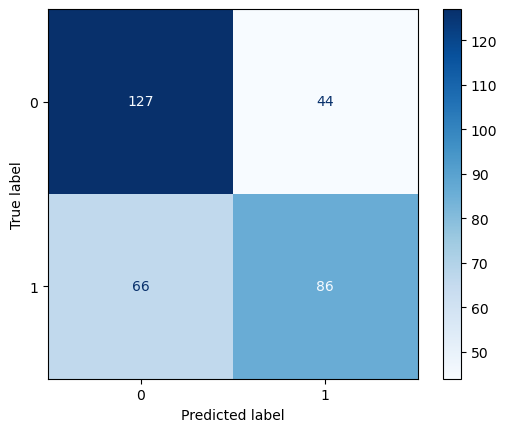

In [17]:
# Plot the confusion matrix
cm_balanced = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_model.classes_)
disp_balanced.plot(cmap=plt.cm.Blues)
plt.savefig('confusion_matrix.svg')
plt.show()

In [2]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test)

# Check the type of shap_values
print(type(shap_values))

<class 'numpy.ndarray'>


In [200]:
# If shap_values is a list (as in the case of multi-class models), choose one class
if isinstance(shap_values, list):
    shap_value_to_explain = shap_values[0]  # Choose the first class's SHAP values
else:
    shap_value_to_explain = shap_values  # For binary classification or regression

# Convert to Explanation object
expected_value = explainer.expected_value
if isinstance(expected_value, list):
    expected_value = expected_value[1]  # Choose the expected value for the first class

explanation = shap.Explanation(values=shap_value_to_explain, base_values=expected_value, data=X_test)

# Plot waterfall
shap.plots.waterfall(explanation[0, 0]) 



IndexError: invalid index to scalar variable.

<Figure size 800x250 with 0 Axes>

In [25]:
import shap

# Create a SHAP explainer object
explainer = shap.TreeExplainer(best_model)

# Calculate SHAP values
shap_values = explainer.shap_values(X)

# Select the class index you are interested in (e.g., class 0)
class_index = 1

# Extract SHAP values for the selected class
shap_values_class = shap_values[:, :, class_index]

# Extract expected value for the selected class
expected_value_class = explainer.expected_value[class_index]

# Create an Explanation object for the selected class
explanation = shap.Explanation(
    values=shap_values_class,
    base_values=expected_value_class,
    data=X
)



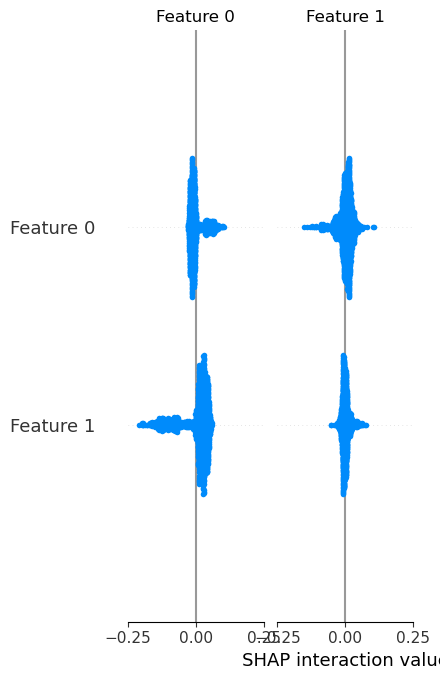

In [242]:
shap.summary_plot(shap_values)

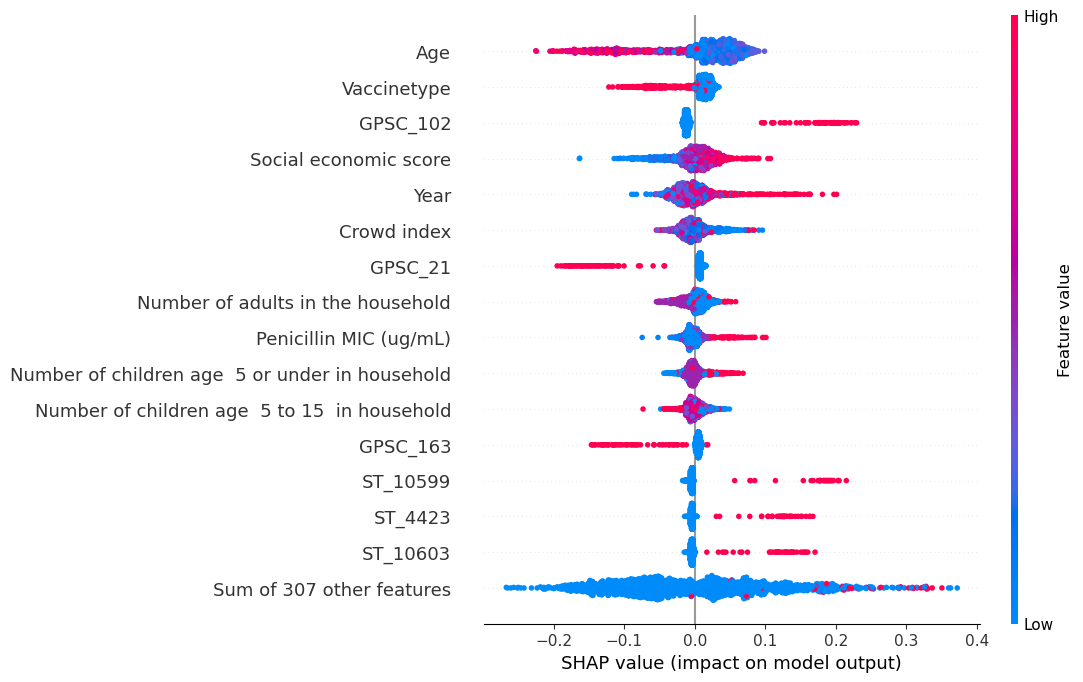

In [26]:

shap.plots.beeswarm(explanation, show=False, max_display=16)
plt.savefig('shap_beeswarm_plot.svg', format='svg')

In [28]:
# Slice the shap_values array to select the first interaction effect
shap_values_sliced = shap_values[:, :, 1]  # Select the first interaction effect

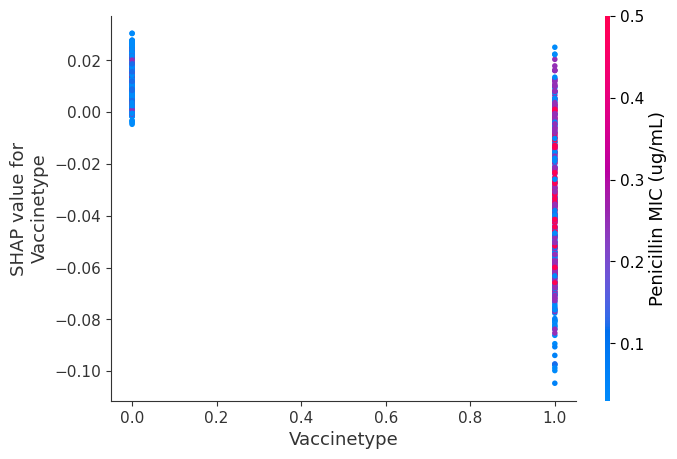

In [238]:
shap.dependence_plot("Vaccinetype", shap_values_sliced, X, interaction_index="Penicillin MIC (ug/mL)")

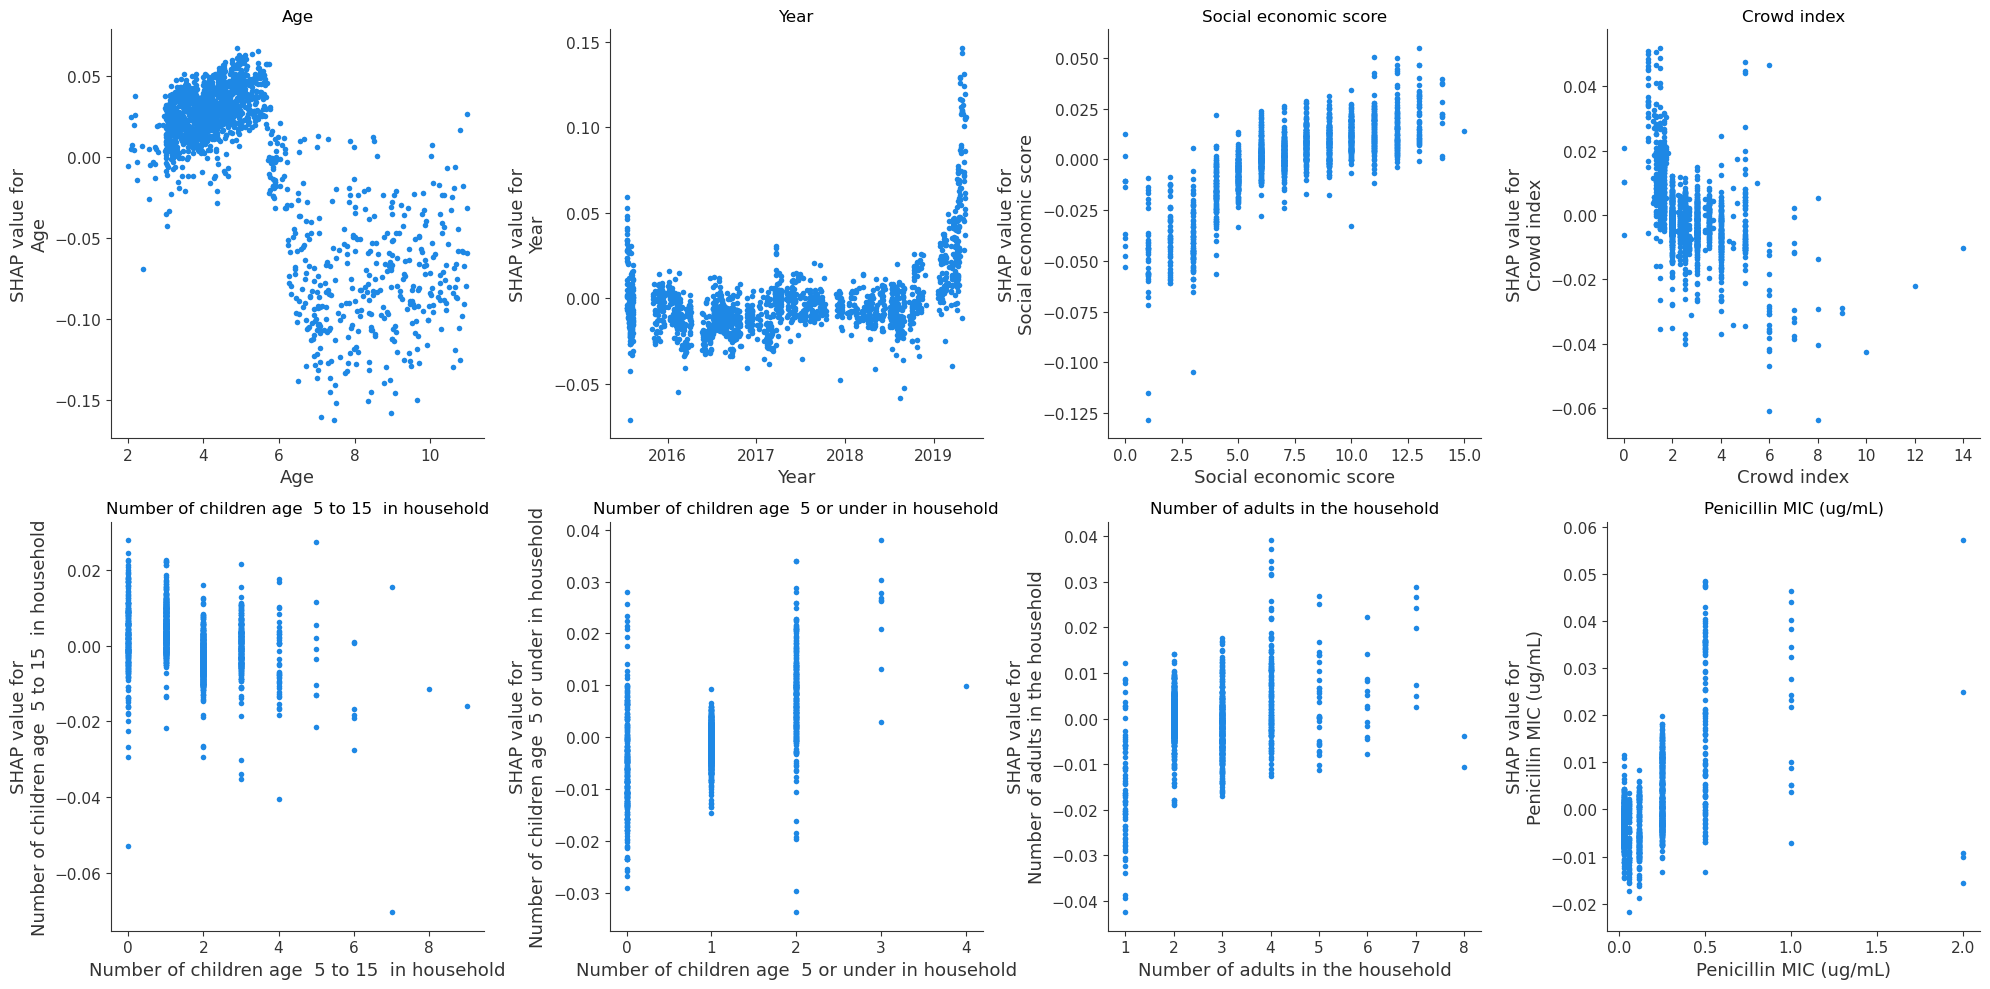

In [8]:
import shap
import matplotlib.pyplot as plt

# Assuming shap_values_sliced is your SHAP values matrix and X is your feature matrix

# Define the features you want to plot and their corresponding filenames
features = [
    ("Age", "pp_Age_plot.svg"),
    ("Year", "Year_score.svg"),
    ("Social economic score", "pp_Ses_score.svg"),
    ("Crowd index", "Crowd_index.svg"),
    ("Number of children age  5 to 15  in household", "Number of children age  5 to 15  in household.svg"),
    ("Number of children age  5 or under in household", "Number of children age  5 or under in household.svg"),
    ("Number of adults in the household", "Number of children age  5 or under in household.svg"),
    ("Penicillin MIC (ug/mL)", "MIC.svg")  
]

# Create a single figure for all plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjust figsize as needed

for i, (feature_name, filename) in enumerate(features):
    row = i // 4
    col = i % 4
    
    # Generate dependence plot for the current feature
    shap.dependence_plot(feature_name, shap_values_sliced, X, interaction_index=None, show=False, ax=axes[row, col])
    
    # Set subplot title (optional)
    axes[row, col].set_title(feature_name)

# Adjust layout
plt.tight_layout()

# Save the entire figure as SVG
plt.savefig('dependency_plots_combined.svg', format='svg')

# Display the plot
plt.show()


In [155]:
# Separate features (X) and target variable (y)

df_encoded_selected = df_encoded[selected_feature_names]
X = df_encoded_selected # Assuming 'T1' is the target variable
y = df_encoded['Less_than_4y_3km']


RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [1000, 2000, 3000, 4000],  # Adjust as needed
    'max_depth': [10, 15, 20, 30, 40, None]  # Adjust as needed
}

# Create a Balanced Random Forest Classifier
clf = BalancedRandomForestClassifier(
    sampling_strategy="auto", replacement=True, random_state=RANDOM_SEED, bootstrap=True, oob_score=True
)

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_balanced = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_model.classes_)
disp_balanced.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix (Balanced Random Forest)')
plt.show()

# Print classification report for the balanced model
print("Classification Report (Balanced Random Forest):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.title('ROC Curve (Balanced Random Forest)')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.title('Precision-Recall Curve (Balanced Random Forest)')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm_balanced.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)


KeyboardInterrupt: 

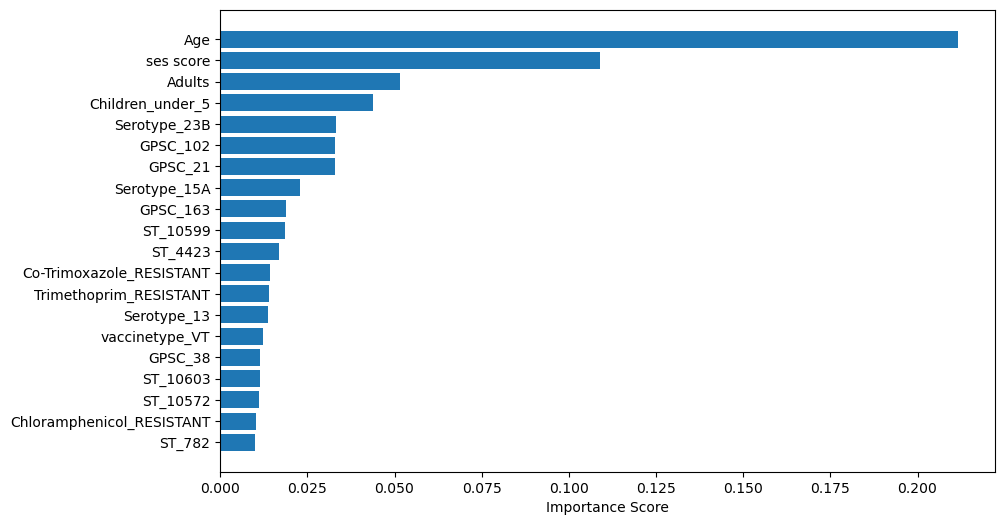

In [79]:
# Plot Important Features
feature_importance = best_model.feature_importances_

# Create a DataFrame with feature names and their importance scores
feature_importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importance})

# Sort the features by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N important features
top_n = 20  # You can adjust the number of features to display
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n][::-1], feature_importance_df['Importance'][:top_n][::-1])
plt.xlabel('Importance Score')
plt.show()


In [119]:
shap.summary_plot(shap_values[1], X_train) 

AssertionError: The shape of the shap_values matrix does not match the shape of the provided data matrix.

In [159]:
from numpy import corrcoef, fill_diagonal, triu_indices, arange
from numpy import mean

df_corr = corrcoef(X, rowvar=False)

from numpy import fill_diagonal

fill_diagonal(df_corr, 0)

fig, ax = plt.subplots(figsize=(7,7))

im = ax.imshow(df_corr, cmap='coolwarm');

fig.colorbar(im, orientation='horizontal', shrink=0.7);
ax.set_title('bivariate Correlation');

column_average = mean(abs(df_corr), axis=0)

fig, ax = plt.subplots()

bins = arange(len(column_average))

ax.bar(bins, column_average);
ax.set_title('Average Correlation Strength per Column');


# Average of the correlation strengths
corr_matrix_average = mean(abs(df_corr))

print('Average Correlation Strength: ', round(corr_matrix_average, 3))

AttributeError: 'float' object has no attribute 'shape'

In [141]:
# Convert DataFrame to NumPy array
numpy_array = X.values

# Print the NumPy array
print(numpy_array)


[[0.25 2016.191667 7.8329911 ... True False True]
 [0.25 2015.608333 3.7180014 ... True False True]
 [0.25 2016.594444 3.8028748 ... True False True]
 ...
 [0.25 2018.833333 7.0609174 ... True False True]
 [2.0 2016.816667 4.66256 ... True False True]
 [2.0 2019.288889 2.7104723 ... True False True]]


Cross-Validation Scores: [0.75472262 0.70384983 0.74414156 0.75819672 0.7835704 ]
ROC AUC on Test Set: 0.7381097560975609


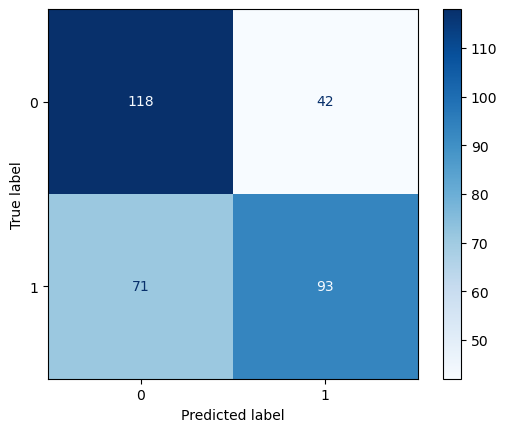

Classification Report (CatBoost):
               precision    recall  f1-score   support

           0       0.62      0.74      0.68       160
           1       0.69      0.57      0.62       164

    accuracy                           0.65       324
   macro avg       0.66      0.65      0.65       324
weighted avg       0.66      0.65      0.65       324



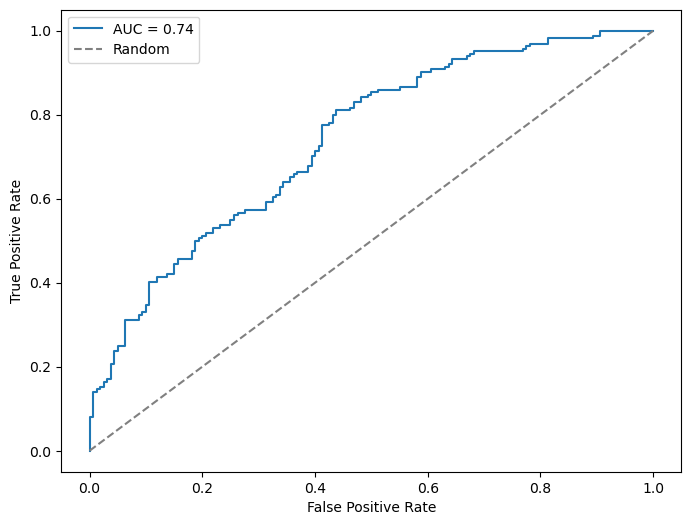

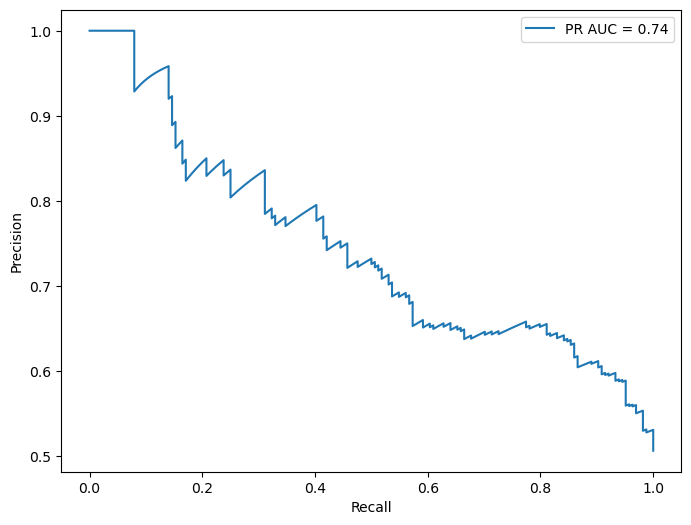

J-Statistic: 0.3045731707317074


In [15]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import roc_auc_score, make_scorer, confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_curve, auc, precision_recall_curve, average_precision_score
from catboost import CatBoostClassifier
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/Users/rorycave/divergent_rand_forest.csv')

# Identify the categorical features (modify this list according to your dataset)
categorical_features = ['GPSC', 'ST','Serotype', 'vaccinetype', 'Chloramphenicol', 'Clindamycin', 'Erythromycin', 'Fluoroquinolones', 'Kanamycin', 'Linezolid', 'Tetracycline', 'Trimethoprim', 'Sulfamethoxazole', 'Co-Trimoxazole']  # Replace with your actual categorical feature names

# Ensure categorical features are treated as strings
for col in categorical_features:
    df[col] = df[col].astype(str)

# Define features and target
X = df.drop(['Less_than_4y_3km','id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms', 'hh_pop', 'hh_pop', 'recent_div', 'Less_than_3'], axis=1)
y = df['Less_than_3']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the CatBoost model
model = CatBoostClassifier(silent=True, cat_features=categorical_features)

# Define hyperparameters to tune
param_grid = {
    'iterations': [100, 200],
    'depth': [4, 6, 8],
    'learning_rate': [0.01, 0.1, 0.2],
    'l2_leaf_reg': [1, 3, 5, 7, 9]
}

# Define the scoring method
scoring = make_scorer(roc_auc_score)

# Grid search
grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=3, scoring=scoring, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Evaluate on the test set
y_pred = best_model.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred)
print("ROC AUC on Test Set:", roc_auc)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Predict test set classes
predict_test = best_model.predict(X_test)

# Plot the confusion matrix
cm_balanced = confusion_matrix(y_test, predict_test)
disp_balanced = ConfusionMatrixDisplay(confusion_matrix=cm_balanced, display_labels=best_model.classes_)
disp_balanced.plot(cmap=plt.cm.Blues)
plt.savefig('confusion_matrix.svg')
plt.show()

# Print classification report for the balanced model
print("Classification Report (CatBoost):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_curve.svg')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision_recall_curve.svg')
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = cm_balanced.ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)




In [16]:
import shap

explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0, ...])

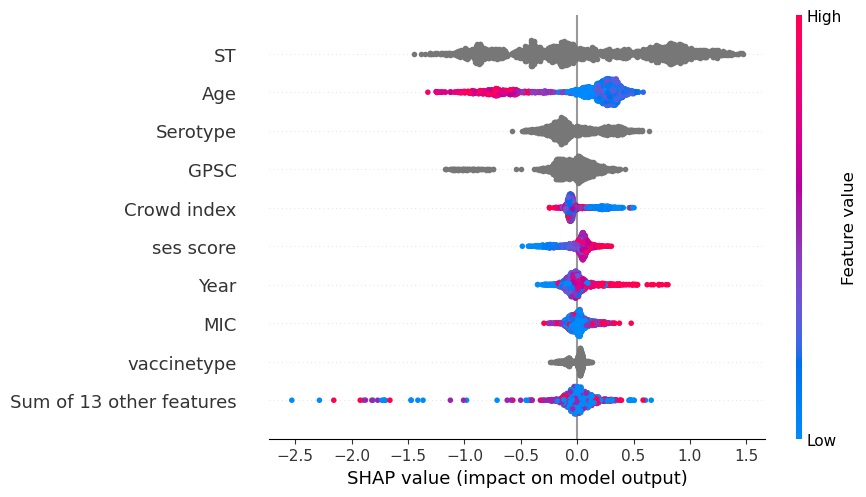

In [17]:
shap.plots.beeswarm(shap_values)

In [8]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, roc_curve, auc, precision_recall_curve, average_precision_score, classification_report
from xgboost import XGBClassifier
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Load the CSV file into a pandas DataFrame
file_path = "/Users/rorycave/divergent_rand_forest.csv"  # Replace with the actual file path
df = pd.read_csv(file_path, delimiter=',')

# Specify categorical columns for one-hot encoding


# For example, if 'sampleid' is not needed for analysis
df_encoded = df.drop(['id', 'MIC_cat', 'cohort', 'sex', 'Risk', 'AMR', 'No_rooms', 'hh_pop', 'hh_pop', 'recent_div', 'Less_than_3'], axis=1)

# Drop rows with missing values
df_encoded = df_encoded.dropna()

# Separate features (X) and target variable (y)
X = df_encoded.drop(['Less_than_4y_3km'], axis=1)  # Assuming 'Less_than_4y_3km' is the target variable
y = df_encoded['Less_than_4y_3km']

RANDOM_SEED = 1234

# Randomly split dataset into test and train sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, stratify=y, random_state=RANDOM_SEED)

# Define the parameter grid for tuning
param_grid = {
    'n_estimators': [100, 200, 300],  # Adjust as needed
    'max_depth': [3, 5, 7, 10],  # Adjust as needed
    'learning_rate': [0.01, 0.1, 0.2]  # Adjust as needed
}

# Create an XGBoost Classifier
clf = XGBClassifier(random_state=RANDOM_SEED, use_label_encoder=False, eval_metric='logloss')

# Use GridSearchCV for hyperparameter tuning with cross-validation
grid_search = GridSearchCV(clf, param_grid, scoring='roc_auc', cv=5)
grid_search.fit(X_train, y_train)

# Get the best parameters
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

# Get the best model
best_model = grid_search.best_estimator_

# Use cross-validation scores for evaluation
cross_val_scores = cross_val_score(best_model, X_train, y_train, cv=5, scoring='roc_auc')
print("Cross-Validation Scores:", cross_val_scores)

# Fit the best model
best_model.fit(X_train, y_train)

# Use the best model for predictions
predict_test = best_model.predict(X_test)

# Extract probabilities for the positive class (assuming binary classification)
probab_test = best_model.predict_proba(X_test)[:, 1]

# Plot the confusion matrix
cm_balanced = confusion_matrix(y_test, predict_test, labels=best_model.classes_)
plt.figure()
plt.imshow(cm_balanced, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.savefig('confusion_matrix.svg')
plt.show()

# Print classification report for the balanced model
print("Classification Report (XGBoost):\n", classification_report(y_test, predict_test))

# Plot ROC curve
fpr, tpr, thresholds = roc_curve(y_test, probab_test)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='grey', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.legend()
plt.savefig('roc_curve.svg')
plt.show()

# Plot Precision-Recall curve
precision, recall, _ = precision_recall_curve(y_test, probab_test)
pr_auc = average_precision_score(y_test, probab_test)

plt.figure()
plt.plot(recall, precision, label=f'PR AUC = {pr_auc:.2f}')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.legend()
plt.savefig('precision_recall_curve.svg')
plt.show()

# Calculate sensitivity and specificity
tn, fp, fn, tp = confusion_matrix(y_test, predict_test).ravel()
sensitivity = tp / (tp + fn)
specificity = tn / (tn + fp)

# Calculate J-statistic
j_statistic = sensitivity + specificity - 1
print("J-Statistic:", j_statistic)


ValueError: 
All the 180 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
180 fits failed with the following error:
Traceback (most recent call last):
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/sklearn/model_selection/_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 1500, in fit
    train_dmatrix, evals = _wrap_evaluation_matrices(
                           ^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 521, in _wrap_evaluation_matrices
    train_dmatrix = create_dmatrix(
                    ^^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/sklearn.py", line 958, in _create_dmatrix
    return QuantileDMatrix(
           ^^^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 1529, in __init__
    self._init(
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 1588, in _init
    it.reraise()
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 576, in reraise
    raise exc  # pylint: disable=raising-bad-type
    ^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 557, in _handle_exception
    return fn()
           ^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 641, in <lambda>
    return self._handle_exception(lambda: self.next(input_data), 0)
                                          ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 1280, in next
    input_data(**self.kwargs)
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 730, in inner_f
    return func(**kwargs)
           ^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/core.py", line 624, in input_data
    new, cat_codes, feature_names, feature_types = _proxy_transform(
                                                   ^^^^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 1315, in _proxy_transform
    arr, feature_names, feature_types = _transform_pandas_df(
                                        ^^^^^^^^^^^^^^^^^^^^^
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 490, in _transform_pandas_df
    _invalid_dataframe_dtype(data)
  File "/Users/rorycave/anaconda3/lib/python3.11/site-packages/xgboost/data.py", line 308, in _invalid_dataframe_dtype
    raise ValueError(msg)
ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:GPSC: object, ST: object, Serotype: object, vaccinetype: object, Chloramphenicol: object, Clindamycin: object, Erythromycin: object, Fluoroquinolones: object, Kanamycin: object, Linezolid: object, Tetracycline: object, Trimethoprim: object, Sulfamethoxazole: object, Co-Trimoxazole: object


In [6]:
import shap
explainer = shap.TreeExplainer(best_model)
shap_values = explainer(X)

# visualize the first prediction's explanation
shap.plots.force(shap_values[0, ...])

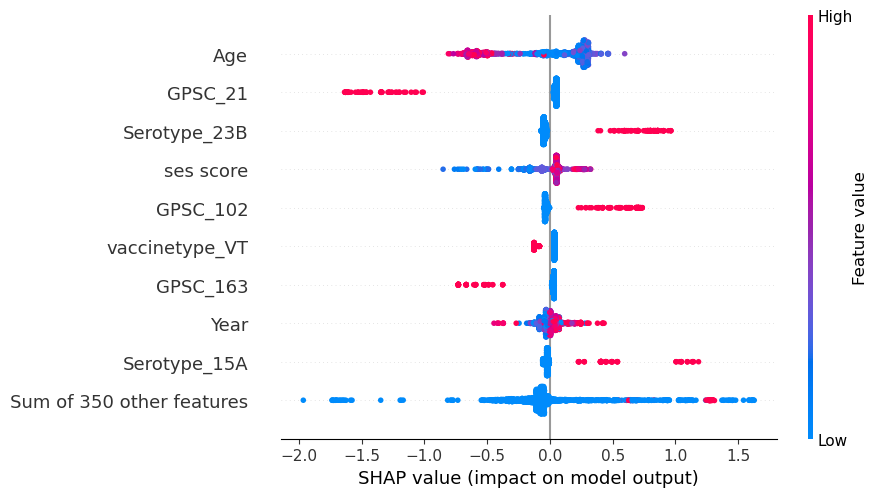

In [7]:
shap.plots.beeswarm(shap_values)

In [232]:
import numpy as np
import itertools

# Assuming 'best_model' is already trained as per your script
importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a DataFrame to hold feature importances
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances})
feature_importance_df = feature_importance_df.sort_values(by='importance', ascending=False)
print(feature_importance_df.head(15))  # Display top 10 important features


                                             feature  importance
3                                                Age    0.124590
2                                               Year    0.111340
5                              Social economic score    0.080647
4                                        Crowd index    0.069769
7      Number of children age  5 to 15  in household    0.048064
8                  Number of adults in the household    0.039339
6    Number of children age  5 or under in household    0.029885
285                                         GPSC_102    0.027425
1                             Penicillin MIC (ug/mL)    0.024382
106                                          ST_4423    0.015358
296                                          GPSC_21    0.015090
0                                        Vaccinetype    0.014042
319                           Tetracycline_RESISTANT    0.011623
20                                          ST_10599    0.011377
317                      

In [233]:
# Select top N features to create interactions (let's use top 5 for this example)
top_features = feature_importance_df.head(5)['feature'].tolist()

# Create interaction terms
for feature_pair in itertools.combinations(top_features, 2):
    feature1, feature2 = feature_pair
    interaction_term_name = f"{feature1}_x_{feature2}"
    X_train[interaction_term_name] = X_train[feature1] * X_train[feature2]
    X_test[interaction_term_name] = X_test[feature1] * X_test[feature2]


Best Parameters with Interaction Terms: {'max_depth': 10, 'n_estimators': 2000}
Cross-Validation Scores with Interaction Terms: [0.71526814 0.62454003 0.70513362 0.72117995 0.70673311]


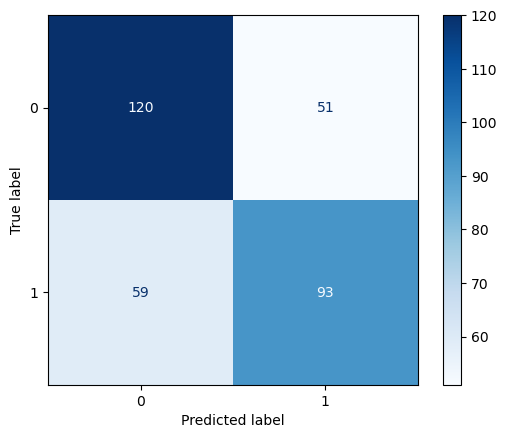

Classification Report with Interaction Terms:
               precision    recall  f1-score   support

           0       0.67      0.70      0.69       171
           1       0.65      0.61      0.63       152

    accuracy                           0.66       323
   macro avg       0.66      0.66      0.66       323
weighted avg       0.66      0.66      0.66       323



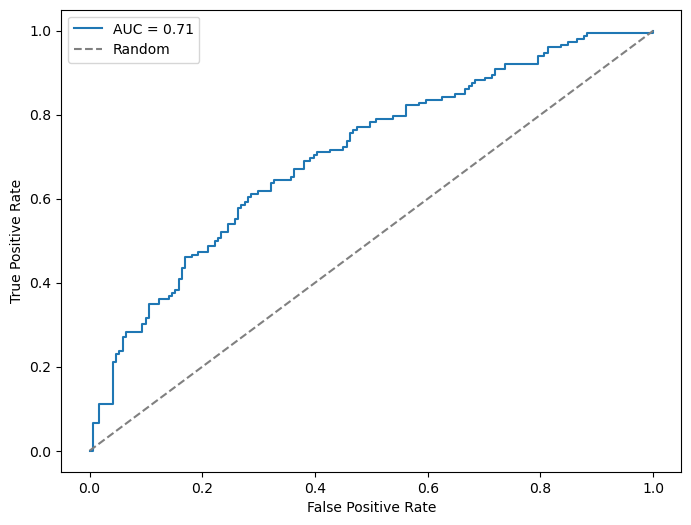

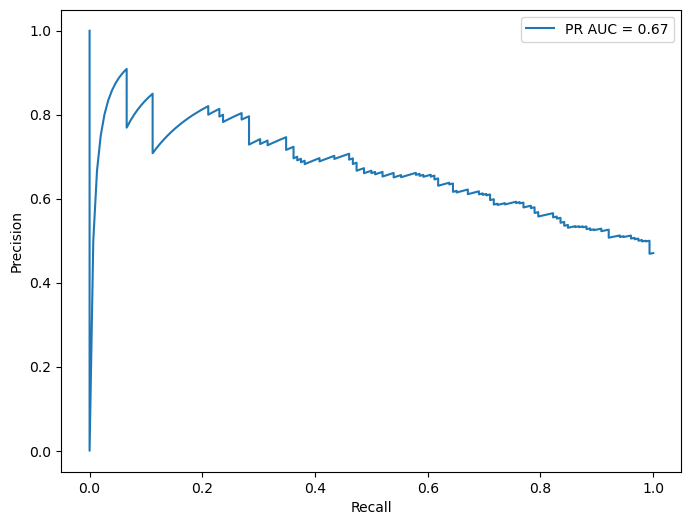

J-Statistic with Interaction Terms: 0.3135964912280702


Trend for Age: slope=-0.0174, intercept=0.0920, r_value=-0.7393, p_value=8.0109e-279
Trend for Year: slope=0.0081, intercept=-16.3732, r_value=0.4292, p_value=2.9685e-73
Trend for Social economic score: slope=0.0050, intercept=-0.0362, r_value=0.7710, p_value=8.1134e-318
Trend for Crowd index: slope=-0.0048, intercept=0.0124, r_value=-0.4770, p_value=2.2697e-92
Trend for Number of children age  5 to 15  in household: slope=-0.0022, intercept=0.0038, r_value=-0.3235, p_value=1.3851e-40
Trend for Number of children age  5 or under in household: slope=0.0068, intercept=-0.0071, r_value=0.5553, p_value=4.4024e-131
Trend for Number of adults in the household: slope=0.0022, intercept=-0.0056, r_value=0.2818, p_value=8.3730e-31
Trend for Penicillin MIC (ug/mL): slope=0.0276, intercept=-0.0044, r_value=0.5764, p_value=2.1883e-143


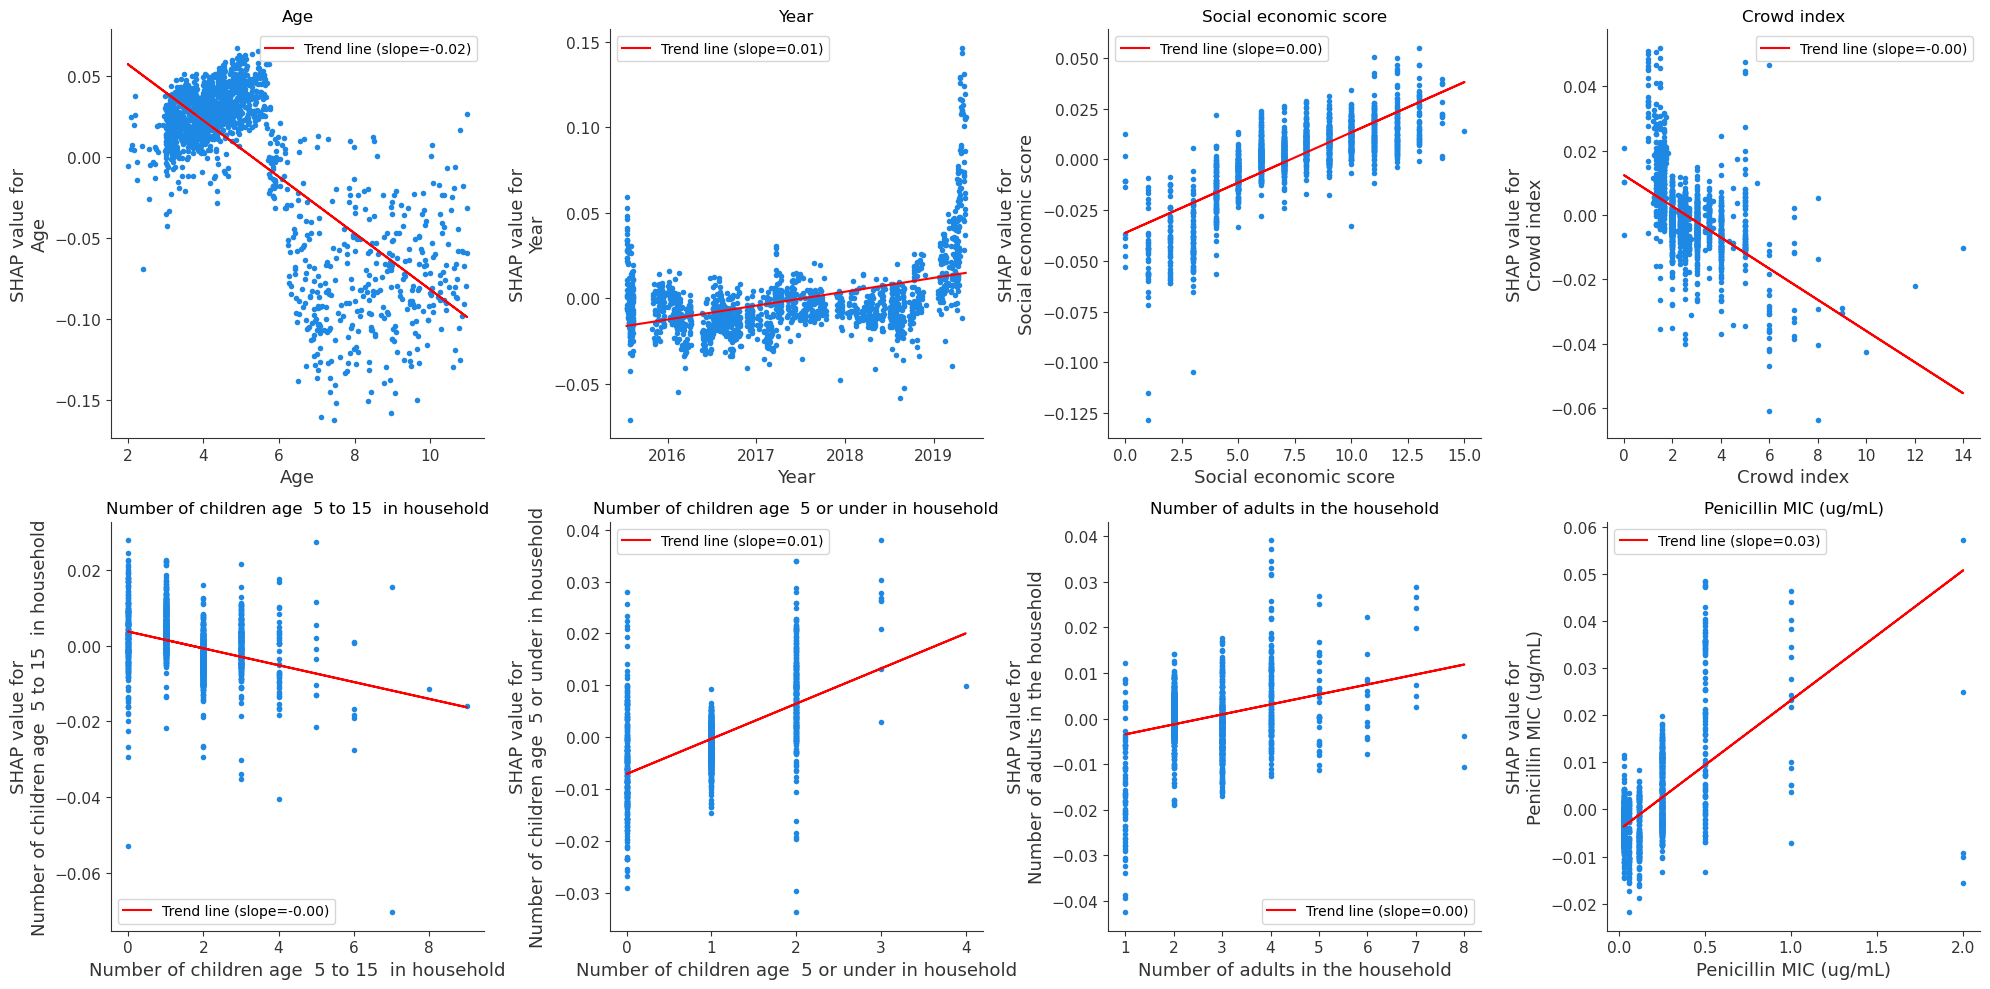

In [10]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress

# Assuming shap_values_sliced is your SHAP values matrix and X is your feature matrix

# Define the features you want to plot and their corresponding filenames
features = [
    ("Age", "pp_Age_plot.svg"),
    ("Year", "Year_score.svg"),
    ("Social economic score", "pp_Ses_score.svg"),
    ("Crowd index", "Crowd_index.svg"),
    ("Number of children age  5 to 15  in household", "Number of children age  5 to 15  in household.svg"),
    ("Number of children age  5 or under in household", "Number of children age  5 or under in household.svg"),
    ("Number of adults in the household", "Number of children age  5 or under in household.svg"),
    ("Penicillin MIC (ug/mL)", "MIC.svg")  
]

# Create a single figure for all plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjust figsize as needed

# Function to analyze and print trends
def analyze_trend(feature_name, shap_values, feature_data, ax):
    # Generate dependence plot
    shap.dependence_plot(feature_name, shap_values, feature_data, interaction_index=None, show=False, ax=ax)
    
    # Extract data from plot for trend analysis
    feature_values = feature_data[feature_name].values
    shap_values_feature = shap_values[:, feature_data.columns.get_loc(feature_name)]
    
    # Perform linear regression to find the trend
    slope, intercept, r_value, p_value, std_err = linregress(feature_values, shap_values_feature)
    
    # Display trend information
    trend_description = f"Trend for {feature_name}: slope={slope:.4f}, intercept={intercept:.4f}, r_value={r_value:.4f}, p_value={p_value:.4e}"
    print(trend_description)
    
    # Plot the trend line
    ax.plot(feature_values, intercept + slope * feature_values, 'r', label=f'Trend line (slope={slope:.2f})')
    ax.legend()

for i, (feature_name, filename) in enumerate(features):
    row = i // 4
    col = i % 4
    
    # Analyze trend and plot for the current feature
    analyze_trend(feature_name, shap_values_sliced, X, axes[row, col])
    
    # Set subplot title (optional)
    axes[row, col].set_title(feature_name)

# Adjust layout
plt.tight_layout()

# Save the entire figure as SVG
plt.savefig('dependency_plots_combined_with_trends.svg', format='svg')

# Display the plot
plt.show()


LOWESS Trend for Age
LOWESS Trend for Year
LOWESS Trend for Social economic score
LOWESS Trend for Crowd index
LOWESS Trend for Number of children age  5 to 15  in household
LOWESS Trend for Number of children age  5 or under in household
LOWESS Trend for Number of adults in the household
LOWESS Trend for Penicillin MIC (ug/mL)


/Users/rorycave/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


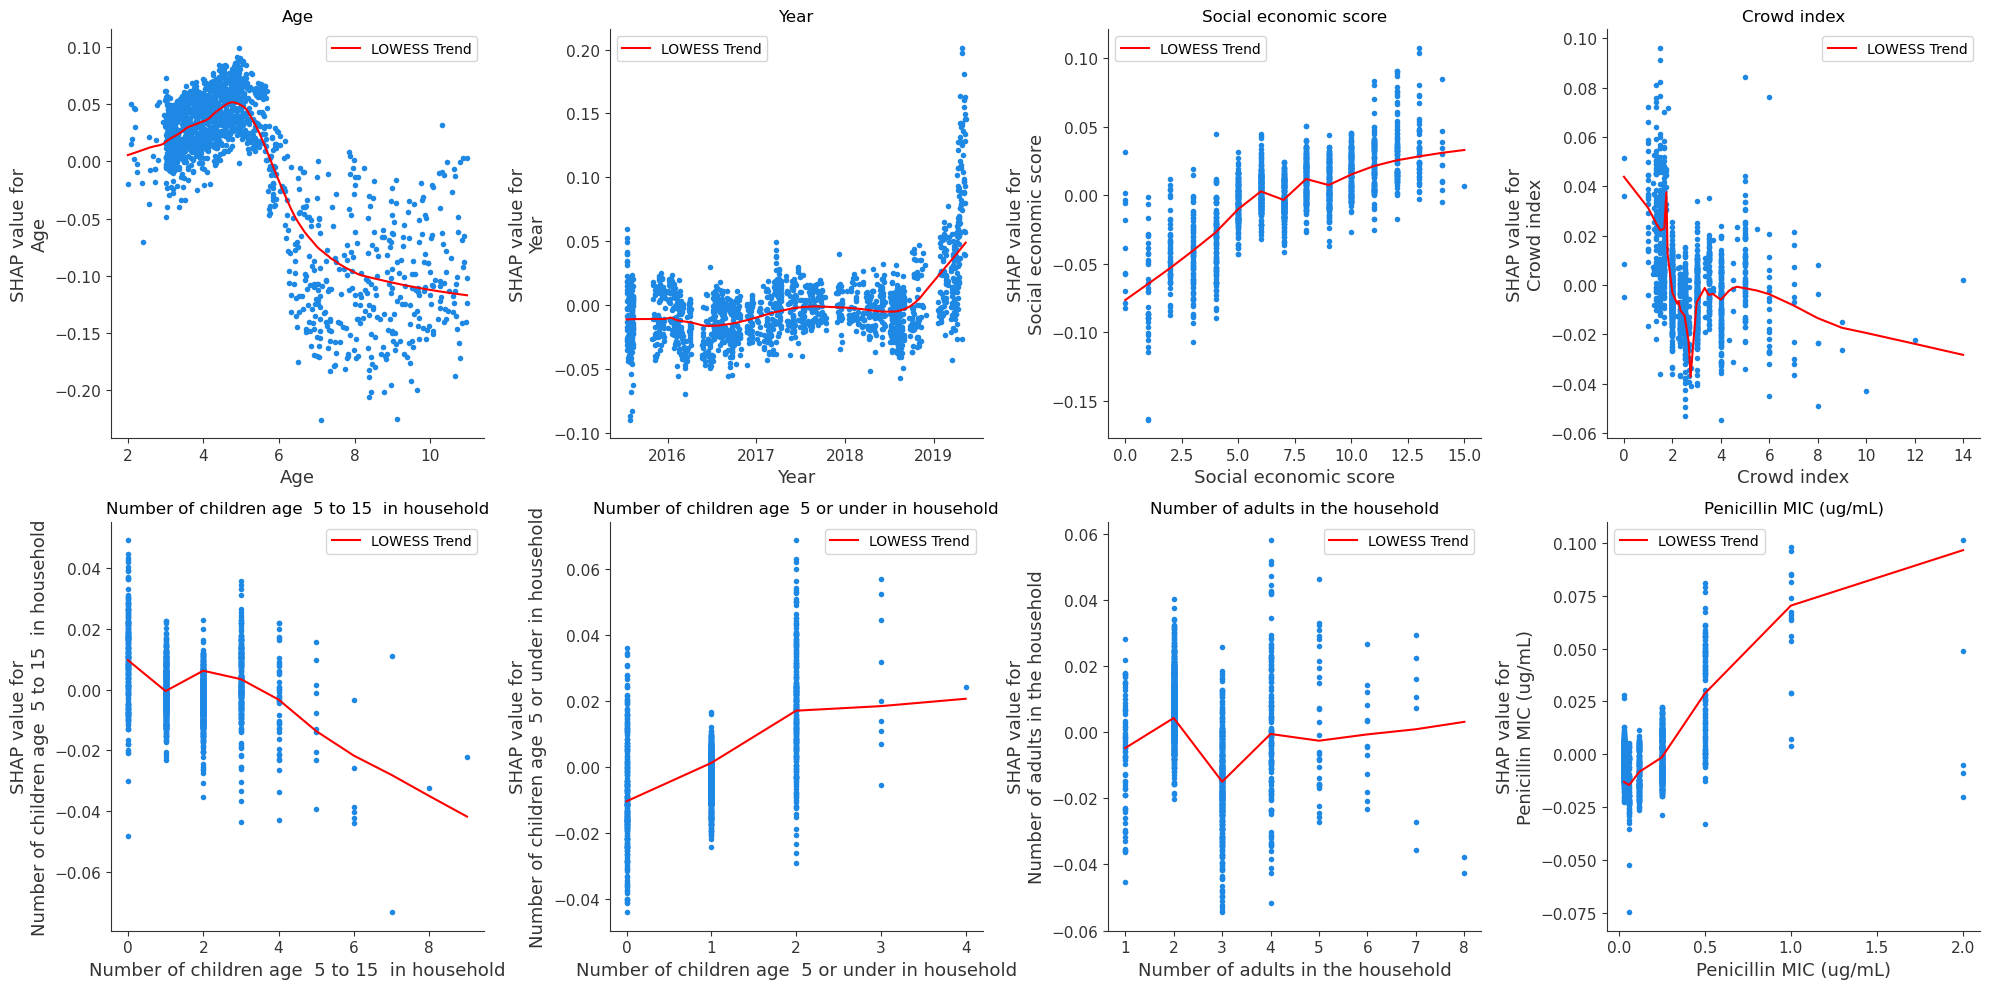

In [29]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import statsmodels.api as sm

# Assuming shap_values_sliced is your SHAP values matrix and X is your feature matrix

# Define the features you want to plot and their corresponding filenames
features = [
    ("Age", "pp_Age_plot.svg"),
    ("Year", "Year_score.svg"),
    ("Social economic score", "pp_Ses_score.svg"),
    ("Crowd index", "Crowd_index.svg"),
    ("Number of children age  5 to 15  in household", "Number of children age  5 to 15  in household.svg"),
    ("Number of children age  5 or under in household", "Number of children age  5 or under in household.svg"),
    ("Number of adults in the household", "Number of adults in the household.svg"),
    ("Penicillin MIC (ug/mL)", "MIC.svg")  
]

# Create a single figure for all plots
fig, axes = plt.subplots(nrows=2, ncols=4, figsize=(20, 10))  # Adjust figsize as needed

# Function to analyze and print trends
def analyze_trend(feature_name, shap_values, feature_data, ax):
    # Generate dependence plot
    shap.dependence_plot(feature_name, shap_values, feature_data, interaction_index=None, show=False, ax=ax)
    
    # Extract data from plot for trend analysis
    feature_values = feature_data[feature_name].values
    shap_values_feature = shap_values[:, feature_data.columns.get_loc(feature_name)]
    
    # Perform LOWESS smoothing to find the trend
    lowess = sm.nonparametric.lowess(shap_values_feature, feature_values, frac=0.3)
    
    # Display trend information
    trend_description = f"LOWESS Trend for {feature_name}"
    print(trend_description)
    
    # Plot the LOWESS trend line
    ax.plot(lowess[:, 0], lowess[:, 1], 'r', label='LOWESS Trend')
    ax.legend()

for i, (feature_name, filename) in enumerate(features):
    row = i // 4
    col = i % 4
    
    # Analyze trend and plot for the current feature
    analyze_trend(feature_name, shap_values_sliced, X, axes[row, col])
    
    # Set subplot title (optional)
    axes[row, col].set_title(feature_name)

# Adjust layout
plt.tight_layout()

# Save the entire figure as SVG
plt.savefig('dependency_plots_combined_with_trends.svg', format='svg')

# Display the plot
plt.show()


LOWESS Trend for Age
LOWESS Trend for Year
LOWESS Trend for Social economic score
LOWESS Trend for Crowd index
LOWESS Trend for Number of children age  5 to 15  in household


/Users/rorycave/anaconda3/lib/python3.11/site-packages/statsmodels/nonparametric/smoothers_lowess.py:227: RuntimeWarning: invalid value encountered in divide
  res, _ = _lowess(y, x, x, np.ones_like(x),


LOWESS Trend for Number of children age  5 or under in household
LOWESS Trend for Number of adults in the household
LOWESS Trend for Penicillin MIC (ug/mL)


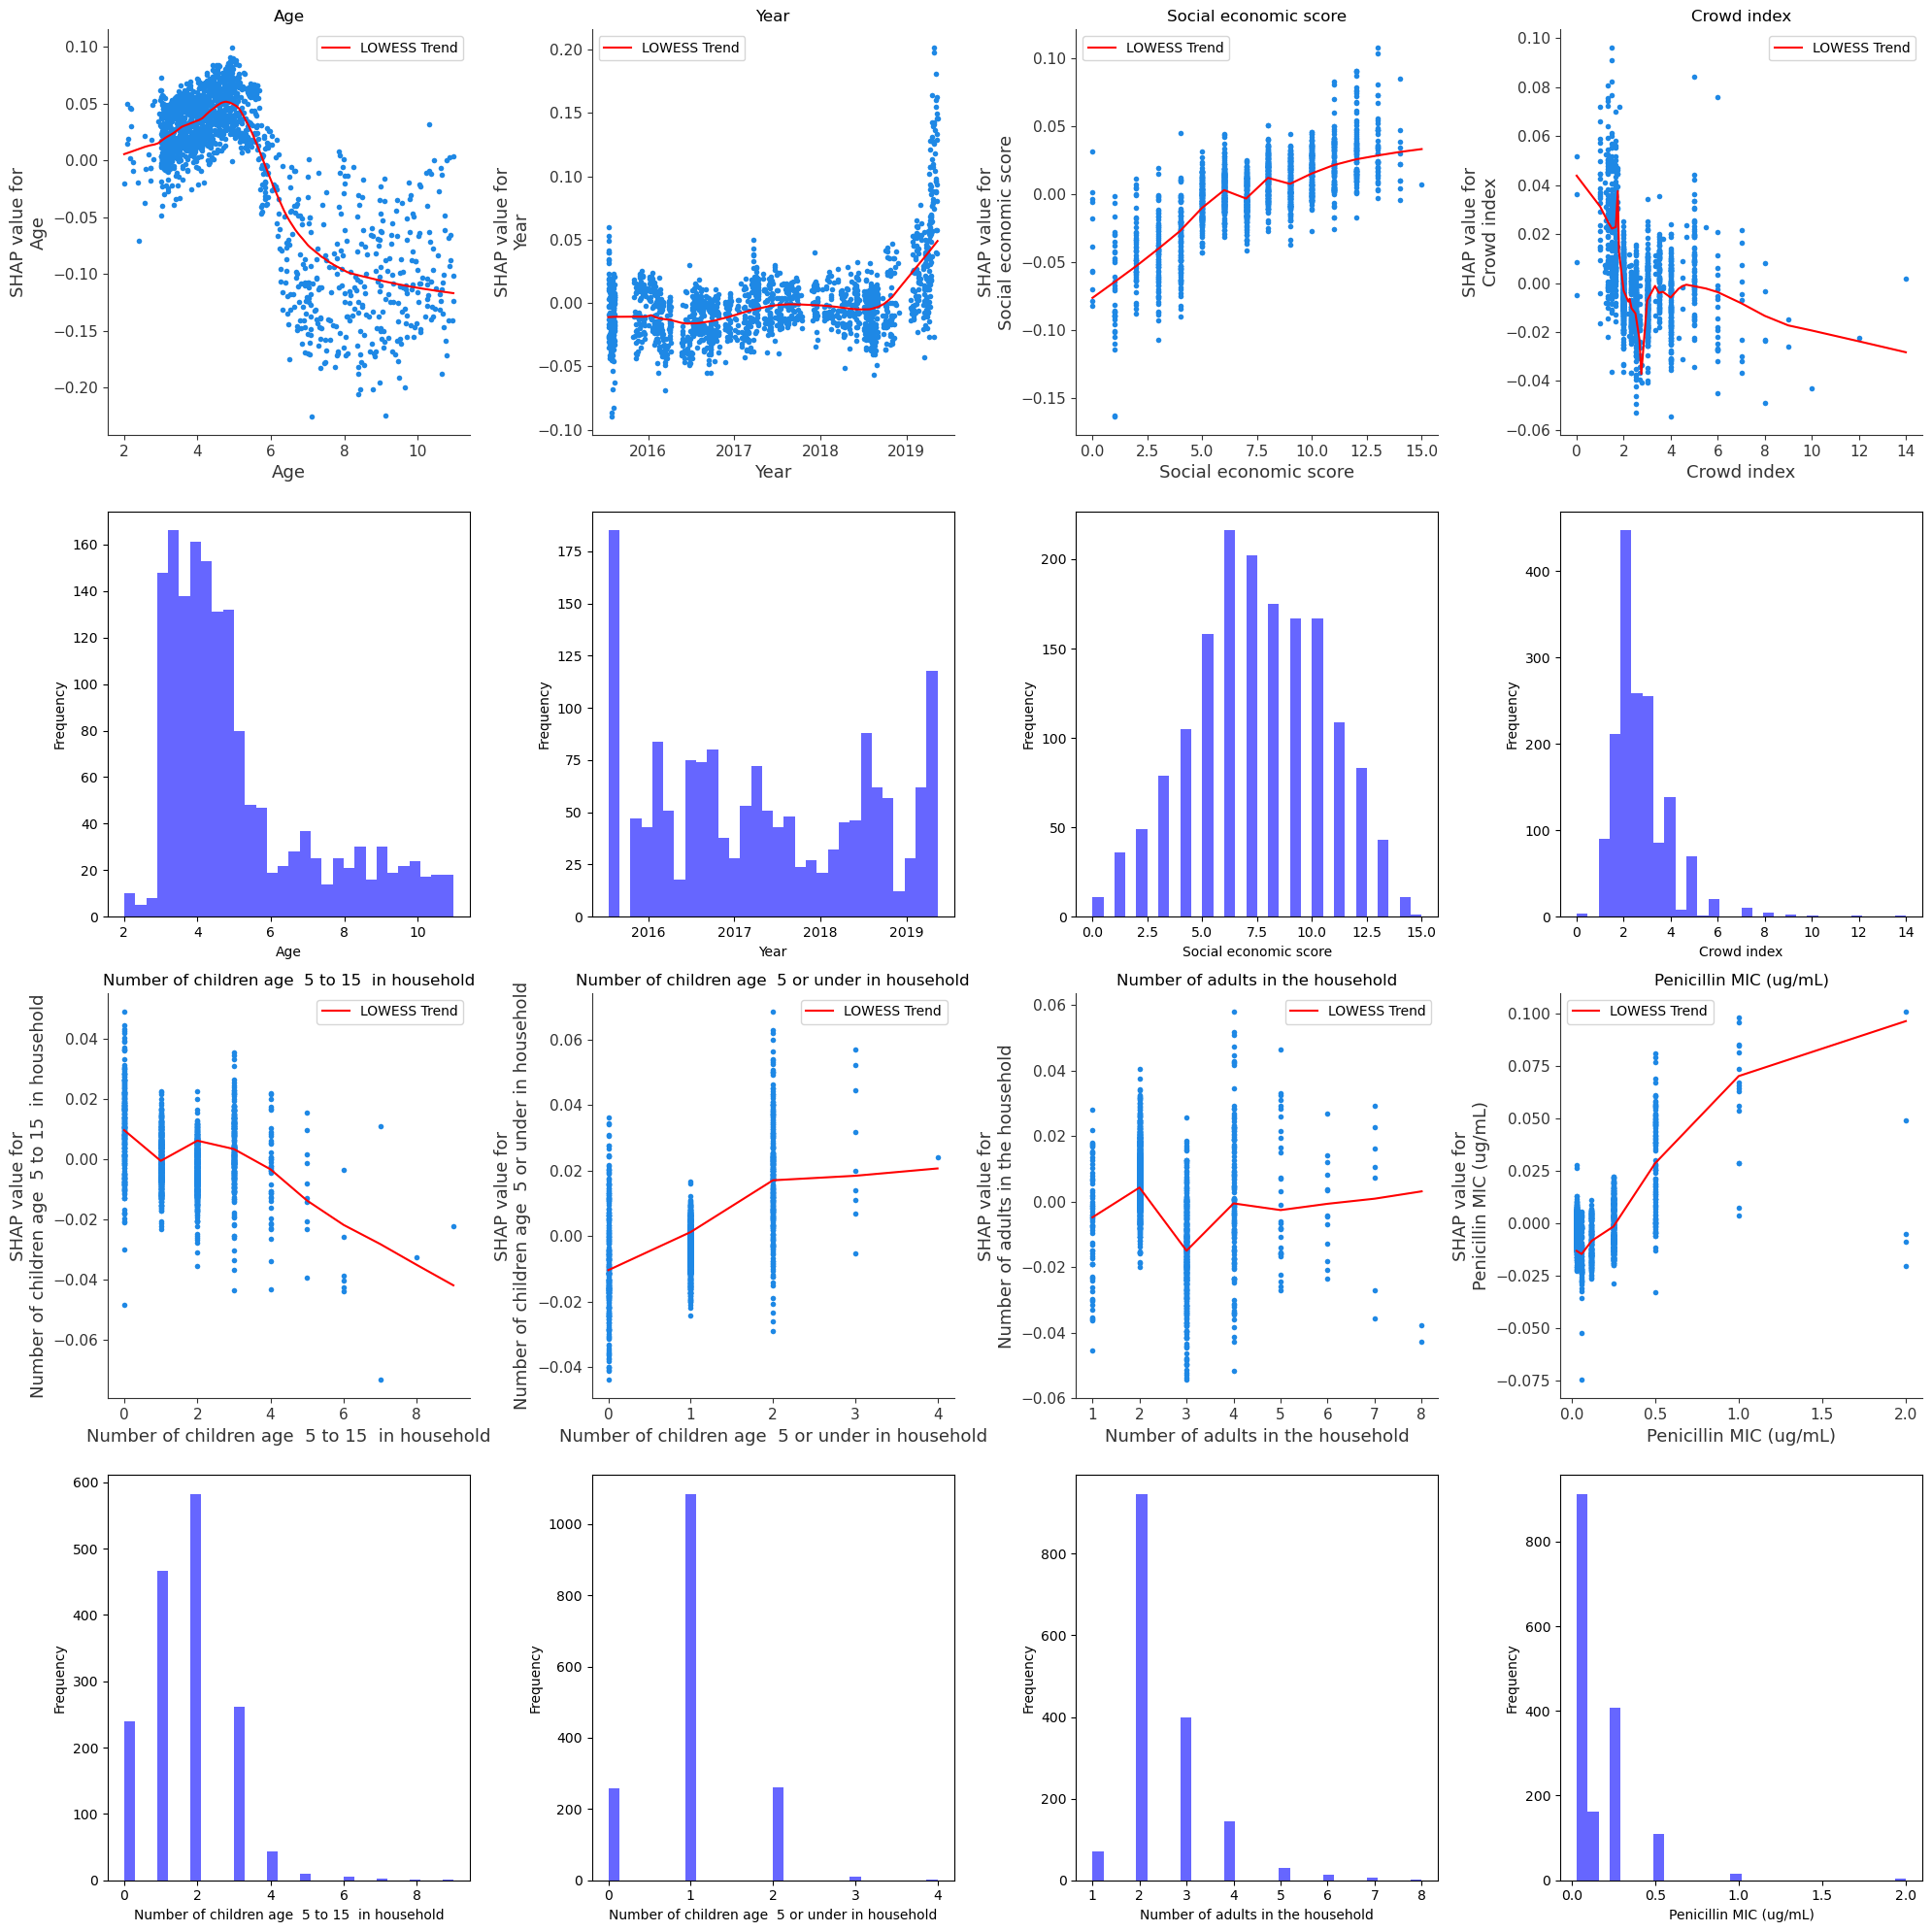

In [31]:
import shap
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.stats import linregress
import statsmodels.api as sm

# Assuming shap_values_sliced is your SHAP values matrix and X is your feature matrix

# Define the features you want to plot and their corresponding filenames
features = [
    ("Age", "pp_Age_plot.svg"),
    ("Year", "Year_score.svg"),
    ("Social economic score", "pp_Ses_score.svg"),
    ("Crowd index", "Crowd_index.svg"),
    ("Number of children age  5 to 15  in household", "Number of children age  5 to 15  in household.svg"),
    ("Number of children age  5 or under in household", "Number of children age  5 or under in household.svg"),
    ("Number of adults in the household", "Number of adults in the household.svg"),
    ("Penicillin MIC (ug/mL)", "MIC.svg")  
]

# Create a single figure for all plots
fig, axes = plt.subplots(nrows=4, ncols=4, figsize=(20, 20))  # Adjust figsize as needed

# Function to analyze and print trends
def analyze_trend(feature_name, shap_values, feature_data, ax_scatter, ax_hist):
    # Generate dependence plot
    shap.dependence_plot(feature_name, shap_values, feature_data, interaction_index=None, show=False, ax=ax_scatter)
    
    # Extract data from plot for trend analysis
    feature_values = feature_data[feature_name].values
    shap_values_feature = shap_values[:, feature_data.columns.get_loc(feature_name)]
    
    # Perform LOWESS smoothing to find the trend
    lowess = sm.nonparametric.lowess(shap_values_feature, feature_values, frac=0.3)
    
    # Display trend information
    trend_description = f"LOWESS Trend for {feature_name}"
    print(trend_description)
    
    # Plot the LOWESS trend line
    ax_scatter.plot(lowess[:, 0], lowess[:, 1], 'r', label='LOWESS Trend')
    ax_scatter.legend()
    
    # Plot histogram
    ax_hist.hist(feature_values, bins=30, alpha=0.6, color='b')
    ax_hist.set_xlabel(feature_name)
    ax_hist.set_ylabel('Frequency')

for i, (feature_name, filename) in enumerate(features):
    row = i // 4 * 2
    col = i % 4
    
    # Analyze trend and plot for the current feature
    analyze_trend(feature_name, shap_values_sliced, X, axes[row, col], axes[row+1, col])
    
    # Set subplot title (optional)
    axes[row, col].set_title(feature_name)

# Adjust layout
plt.tight_layout()

# Save the entire figure as SVG
plt.savefig('dependency_plots_combined_with_trends.svg', format='svg')

# Display the plot
plt.show()

